<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_300-350.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [642]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [643]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

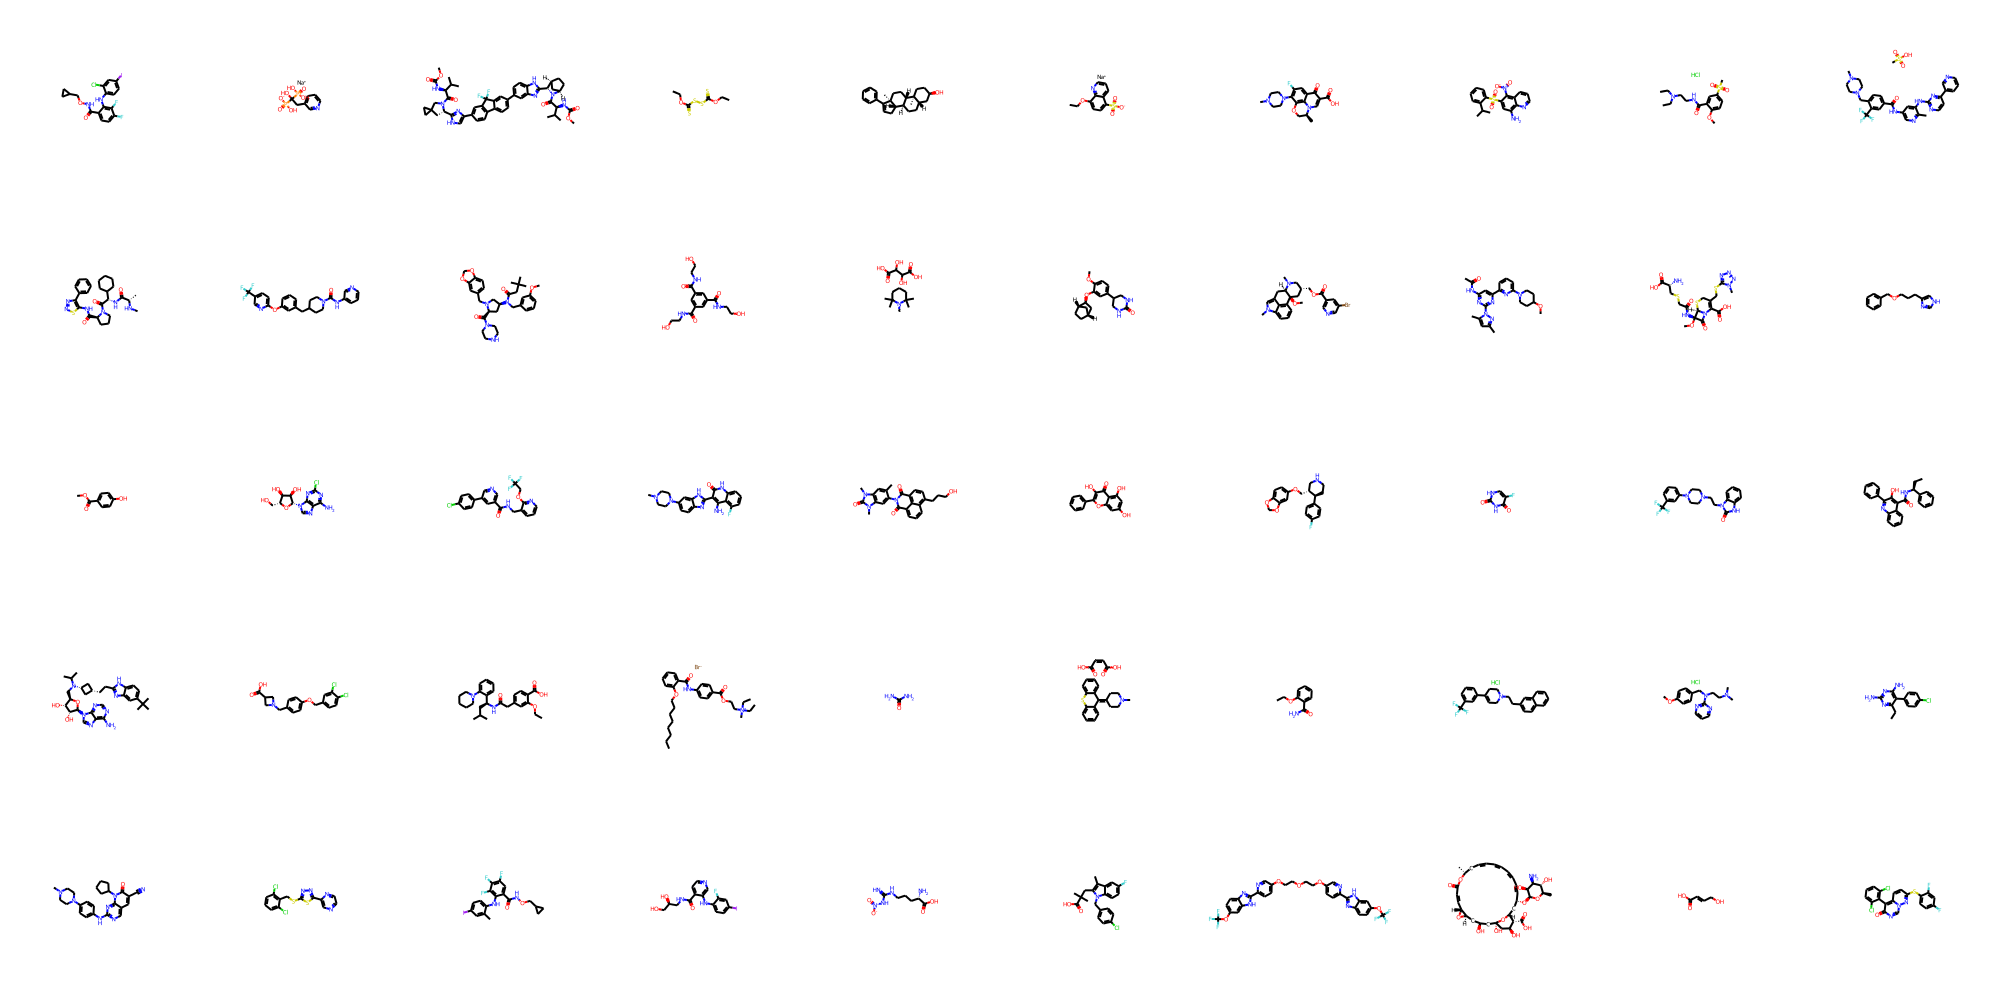

In [797]:
smiles_list = ['O=C(NOCC1CC1)c1ccc(F)c(F)c1Nc1ccc(I)cc1Cl',
'O=P([O-])(O)C(O)(Cc1cccnc1)P(=O)(O)O.[Na+]',
'COC(=O)N[C@H](C(=O)N1CC2(CC2)C[C@H]1c1nc(-c2ccc3c(c2)C(F)(F)c2cc(-c4ccc5[nH]c([C@@H]6[C@H]7CC[C@H](C7)N6C(=O)[C@@H](NC(=O)OC)C(C)C)nc5c4)ccc2-3)c[nH]1)C(C)C',
'CCOC(=S)SSC(=S)OCC',
'C[C@]12CC[C@H]3[C@@H](CC[C@H]4C[C@H](O)CC[C@@]43C)[C@@H]1CC=C2c1ccccc1',
'CCOc1ccc(S(=O)(=O)[O-])c2cccnc12.[Na+]',
'C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23',
'CC(C)c1ccccc1S(=O)(=O)c1cc(N)c2ncccc2c1[N+](=O)[O-]',
'CCN(CC)CCNC(=O)c1cc(S(C)(=O)=O)ccc1OC.Cl',
'CS(=O)(=O)O.Cc1ncc(NC(=O)c2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)cc1Nc1nccc(-c2cccnc2)n1',
'CN[C@@H](C)C(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)Nc1snnc1-c1ccccc1)C1CCCCC1',
'O=C(Nc1cccnc1)N1CCC(Cc2cccc(Oc3ccc(C(F)(F)F)cn3)c2)CC1',
'COc1cccc(CN(C(=O)CC(C)(C)C)[C@H]2C[C@@H](C(=O)N3CCNCC3)N(Cc3ccc4c(c3)OCO4)C2)c1',
'O=C(NCCO)c1cc(C(=O)NCCO)cc(C(=O)NCCO)c1',
'CN1C(C)(C)CCCC1(C)C.O=C(O)C(O)C(O)C(=O)O',
'COc1ccc(C2CNC(=O)NC2)cc1O[C@H]1C[C@@H]2CC[C@H]1C2',
'CO[C@]12C[C@@H](COC(=O)c3cncc(Br)c3)CN(C)[C@@H]1Cc1cn(C)c3cccc2c13',
'COC1CCN(c2cccc(-c3cc(NC(C)=O)nc(-n4nc(C)cc4C)n3)n2)CC1',
'CO[C@@]1(NC(=O)CSC[C@@H](N)C(=O)O)C(=O)N2C(C(=O)O)=C(CSc3nnnn3C)CS[C@@H]21',
'c1ccc(COCCCc2c[nH]cn2)cc1',
'COC(=O)c1ccc(O)cc1',
'Nc1nc(Cl)nc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O',
'O=C(NCc1cccnc1OCC(F)(F)F)c1cncc(-c2ccc(Cl)cc2)c1',
'CN1CCN(c2ccc3nc(-c4c(N)c5c(F)cccc5[nH]c4=O)[nH]c3c2)CC1',
'Cc1cc2c(cc1N1C(=O)c3cccc4c(CCCO)ccc(c34)C1=O)n(C)c(=O)n2C',
'O=c1c(O)c(-c2ccccc2)oc2cc(O)cc(O)c12',
'Fc1ccc([C@@H]2CCNC[C@H]2COc2ccc3c(c2)OCO3)cc1',
'O=c1[nH]cc(F)c(=O)[nH]1',
'O=c1[nH]c2ccccc2n1CCN1CCN(c2cccc(C(F)(F)F)c2)CC1',
'CC[C@H](NC(=O)c1c(O)c(-c2ccccc2)nc2ccccc12)c1ccccc1',
'CC(C)N(C[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1O)[C@H]1C[C@@H](CCc2nc3cc(C(C)(C)C)ccc3[nH]2)C1',
'O=C(O)C1CN(Cc2ccc(OCc3ccc(Cl)c(Cl)c3)cc2)C1',
'CCOc1cc(CC(=O)N[C@@H](CC(C)C)c2ccccc2N2CCCCC2)ccc1C(=O)O',
'CCCCCCCCOc1ccccc1C(=O)Nc1ccc(C(=O)OCC[N+](C)(CC)CC)cc1.[Br-]',
'NC(N)=O',
'CN1CCC(=C2c3ccccc3Sc3ccccc32)CC1.O=C(O)/C=C\C(=O)O',
'CCOc1ccccc1C(N)=O',
'Cl.FC(F)(F)c1cccc(C2=CCN(CCc3ccc4ccccc4c3)CC2)c1',
'COc1ccc(CN(CCN(C)C)c2ncccn2)cc1.Cl',
'CCc1nc(N)nc(N)c1-c1ccc(Cl)cc1',
'CN1CCN(c2ccc(Nc3ncc4cc(C#N)c(=O)n(C5CCCC5)c4n3)cc2)CC1',
'Clc1cccc(Cl)c1CSc1nnc(-c2cnccn2)s1',
'Cc1cc(I)ccc1Nc1c(C(=O)NOCC2CC2)cc(F)c(F)c1F',
'O=C(NC[C@H](O)CO)c1ccncc1Nc1ccc(I)cc1F',
'N=C(NCCC[C@H](N)C(=O)O)N[N+](=O)[O-]',
'Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(F)cc12',
'FC(F)(F)Oc1ccc2nc(-c3ccc(OCCOCCOc4ccc(-c5nc6ccc(OC(F)(F)F)cc6[nH]5)nc4)cn3)[nH]c2c1',
'C[C@@H]1C/C=C/C=C/C=C/C=C/[C@H](O[C@@H]2O[C@H](C)[C@@H](O)[C@H](N)[C@@H]2O)C[C@@H]2O[C@](O)(C[C@@H](O)C[C@H]3O[C@@H]3/C=C/C(=O)O1)C[C@H](O)[C@H]2C(=O)O',
'O=C(O)/C=C/CO',
'O=c1ncn2nc(Sc3ccc(F)cc3F)ccc2c1-c1c(Cl)cccc1Cl'

]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



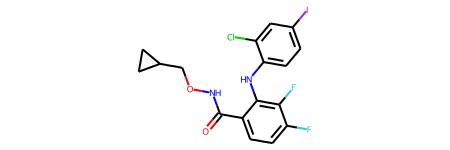

In [798]:
M1 = mol_list [0]
M1

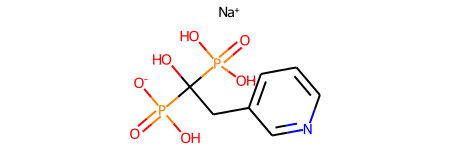

In [799]:
M2 = mol_list [1]
M2

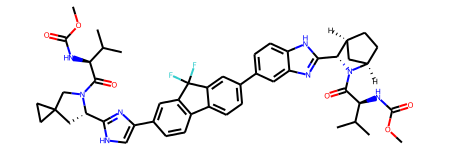

In [800]:
M3 = mol_list [2]
M3

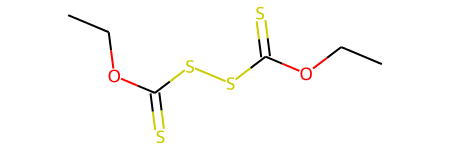

In [801]:
M4 = mol_list [3]
M4

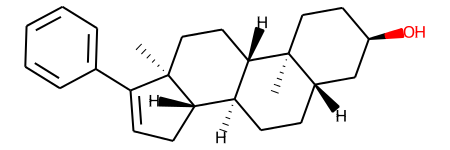

In [802]:
M5 = mol_list [4]
M5

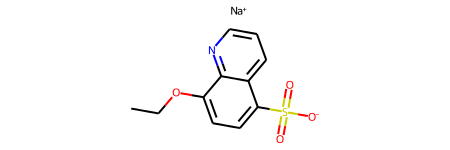

In [804]:
M6 = mol_list [5]
M6

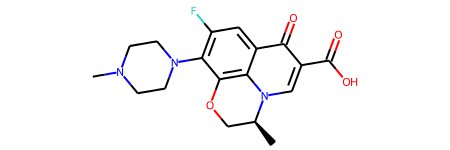

In [805]:
M7 = mol_list [6]
M7

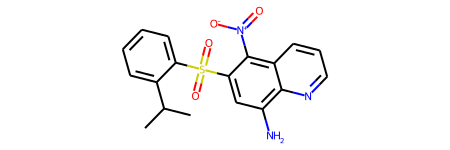

In [806]:
M8 = mol_list [7]
M8

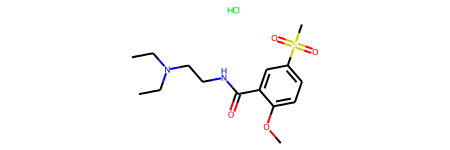

In [807]:
M9 = mol_list [8]
M9

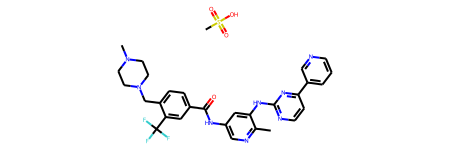

In [808]:
M10= mol_list [9]
M10

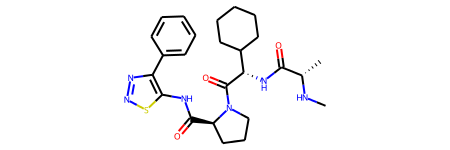

In [809]:
M11= mol_list [10]
M11

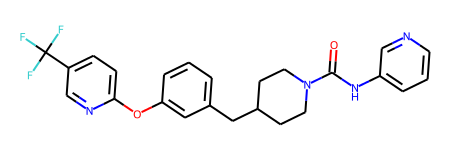

In [810]:
M12= mol_list [11]
M12

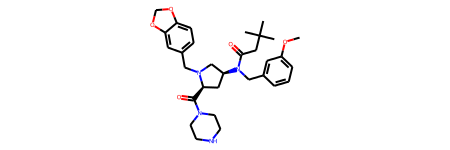

In [811]:
M13= mol_list [12]
M13

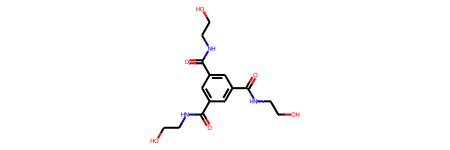

In [812]:
M14= mol_list [13]
M14

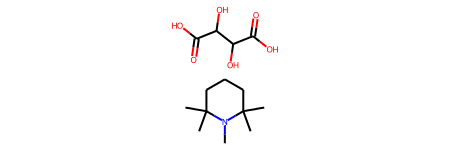

In [813]:
M15= mol_list [14]
M15

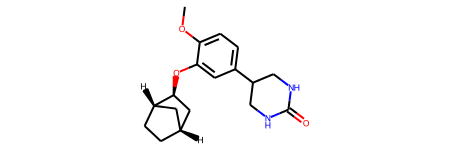

In [814]:
M16= mol_list [15]
M16

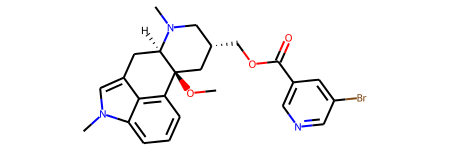

In [815]:
M17= mol_list [16]
M17

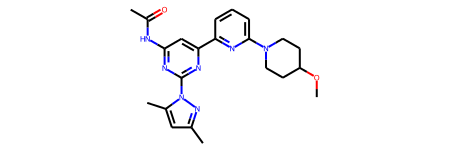

In [816]:
M18= mol_list [17]
M18

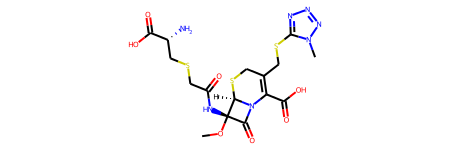

In [817]:
M19= mol_list [18]
M19

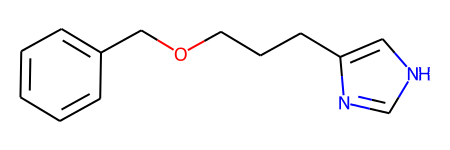

In [818]:
M20= mol_list [19]
M20

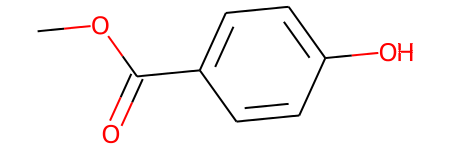

In [819]:
M21= mol_list [20]
M21

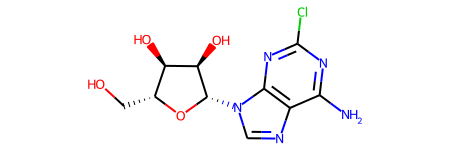

In [820]:
M22= mol_list [21]
M22

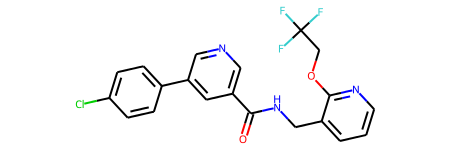

In [821]:
M23= mol_list [22]
M23

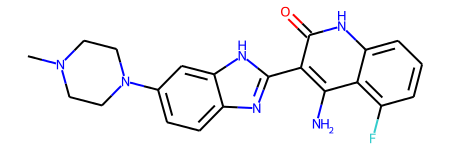

In [822]:
M24= mol_list [23]
M24

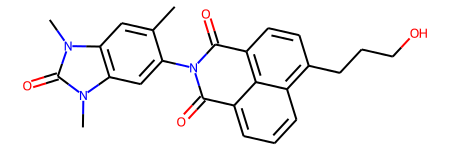

In [823]:
M25= mol_list [24]
M25

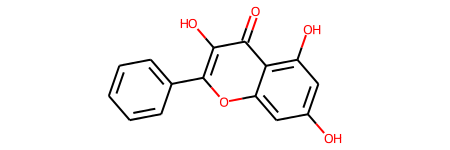

In [824]:
M26= mol_list [25]
M26

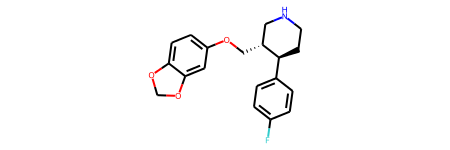

In [825]:
M27= mol_list [26]
M27

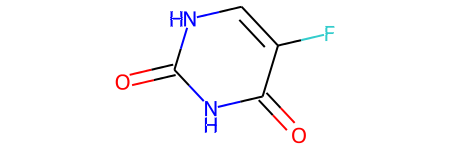

In [826]:
M28= mol_list [27]
M28

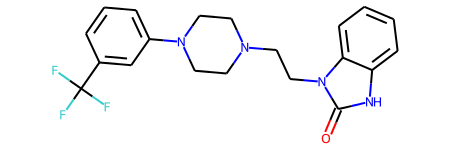

In [827]:
M29= mol_list [28]
M29

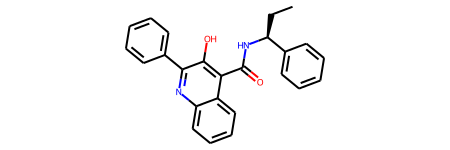

In [828]:
M30= mol_list [29]
M30

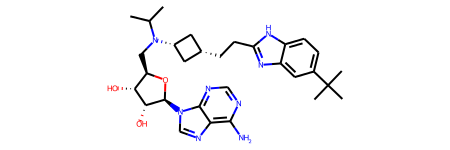

In [829]:
M31= mol_list [30]
M31

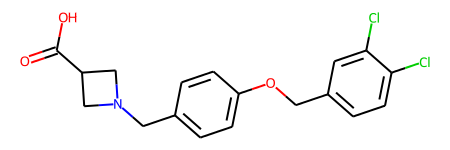

In [830]:
M32= mol_list [31]
M32

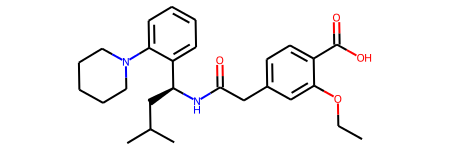

In [831]:
M33= mol_list [32]
M33

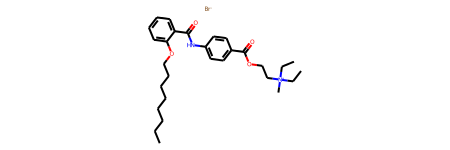

In [832]:
M34= mol_list [33]
M34

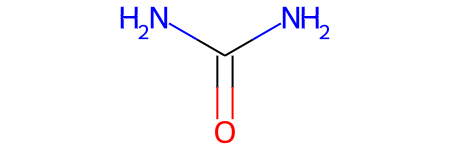

In [833]:
M35= mol_list [34]
M35

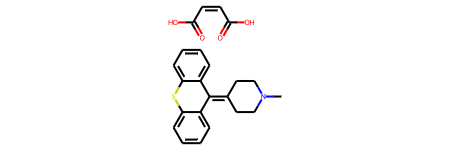

In [834]:
M36= mol_list [35]
M36

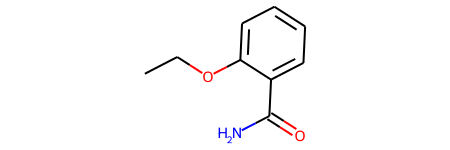

In [835]:
M37= mol_list [36]
M37

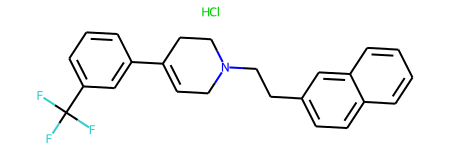

In [836]:
M38= mol_list [37]
M38


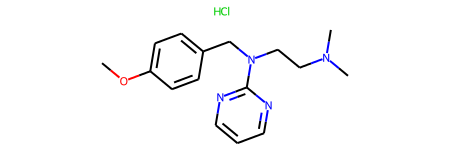

In [837]:
M39= mol_list [38]
M39

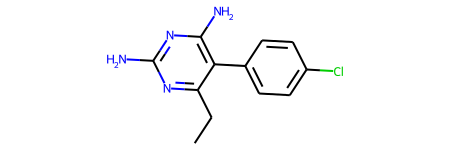

In [838]:
M40= mol_list [39]
M40

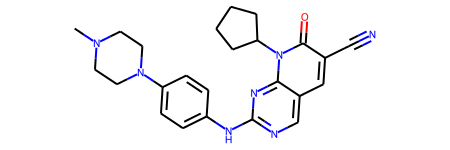

In [839]:
M41= mol_list [40]
M41

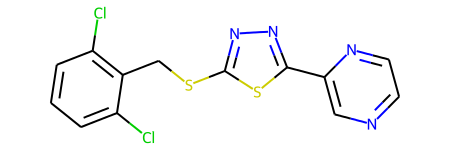

In [840]:
M42= mol_list [41]
M42

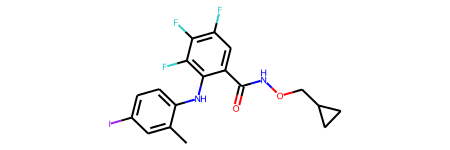

In [841]:
M43= mol_list [42]
M43

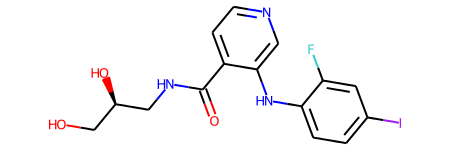

In [842]:
M44= mol_list [43]
M44

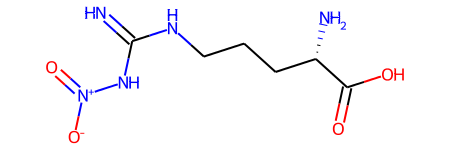

In [843]:
M45= mol_list [44]
M45

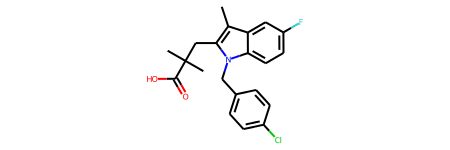

In [844]:
M46= mol_list [45]
M46

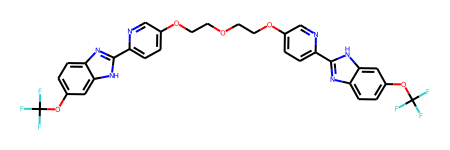

In [845]:
M47= mol_list [46]
M47

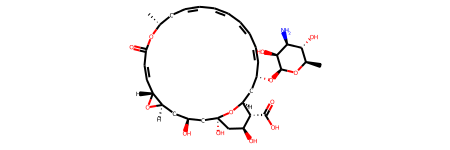

In [846]:
M48= mol_list [47]
M48

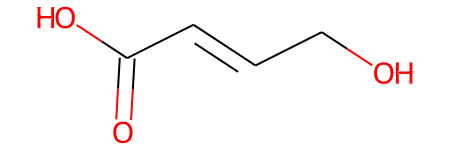

In [847]:
M49= mol_list [48]
M49

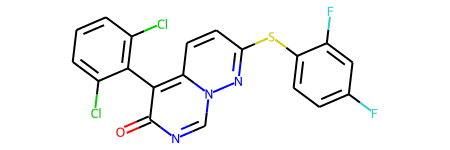

In [848]:
M50= mol_list [49]
M50

In [849]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[12,
 29,
 67,
 80,
 104,
 112,
 122,
 128,
 147,
 200,
 216,
 301,
 356,
 366,
 381,
 396,
 421,
 447,
 470,
 486,
 491,
 517,
 561,
 570,
 614,
 626,
 647,
 650,
 659,
 661,
 695,
 699,
 701,
 726,
 807,
 815,
 816,
 832,
 836,
 849,
 859,
 875,
 888,
 893,
 904,
 926,
 947,
 967,
 999,
 1019]

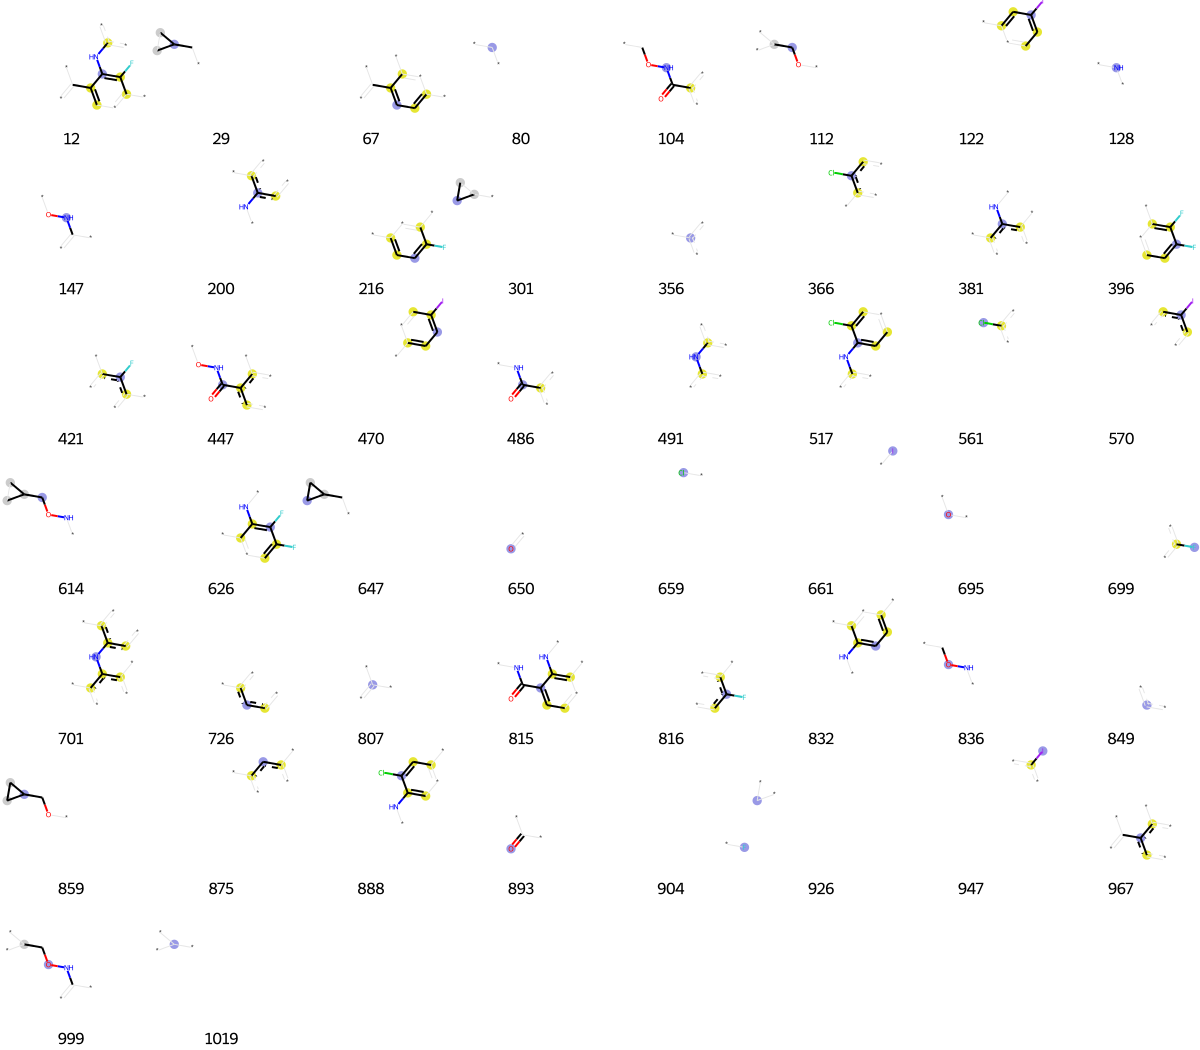

In [850]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [851]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[12,
 29,
 67,
 80,
 104,
 112,
 122,
 128,
 147,
 200,
 216,
 301,
 356,
 366,
 381,
 396,
 421,
 447,
 470,
 486,
 491,
 517,
 561,
 570,
 614,
 626,
 647,
 650,
 659,
 661,
 695,
 699,
 701,
 726,
 807,
 815,
 816,
 832,
 836,
 849,
 859,
 875,
 888,
 893,
 904,
 926,
 947,
 967,
 999,
 1019]

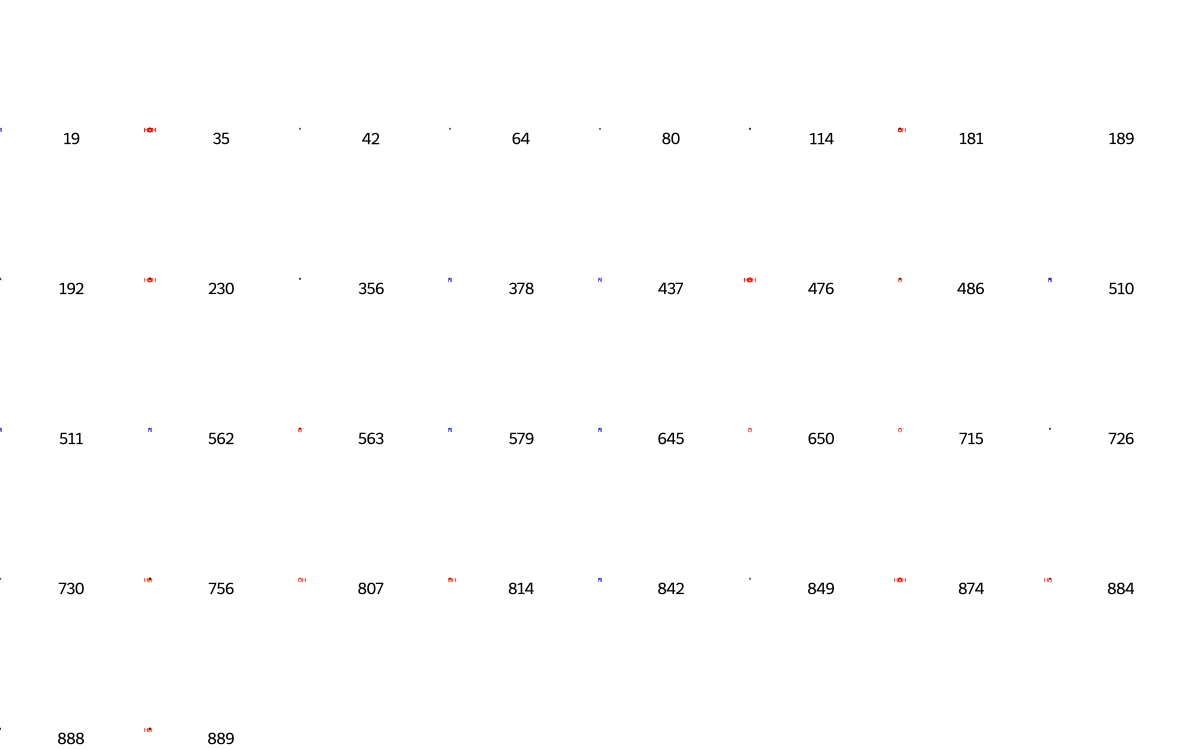

In [852]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [853]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 16,
 33,
 36,
 51,
 72,
 73,
 90,
 94,
 104,
 108,
 114,
 117,
 119,
 128,
 136,
 138,
 208,
 214,
 242,
 247,
 251,
 260,
 268,
 275,
 283,
 288,
 301,
 338,
 339,
 342,
 352,
 356,
 358,
 378,
 438,
 454,
 478,
 507,
 510,
 535,
 571,
 585,
 602,
 609,
 650,
 653,
 658,
 679,
 680,
 681,
 695,
 717,
 721,
 726,
 734,
 736,
 749,
 785,
 806,
 807,
 816,
 831,
 841,
 845,
 849,
 855,
 875,
 884,
 886,
 893,
 896,
 898,
 904,
 915,
 926,
 931,
 935,
 949,
 956,
 980,
 1019,
 1023]

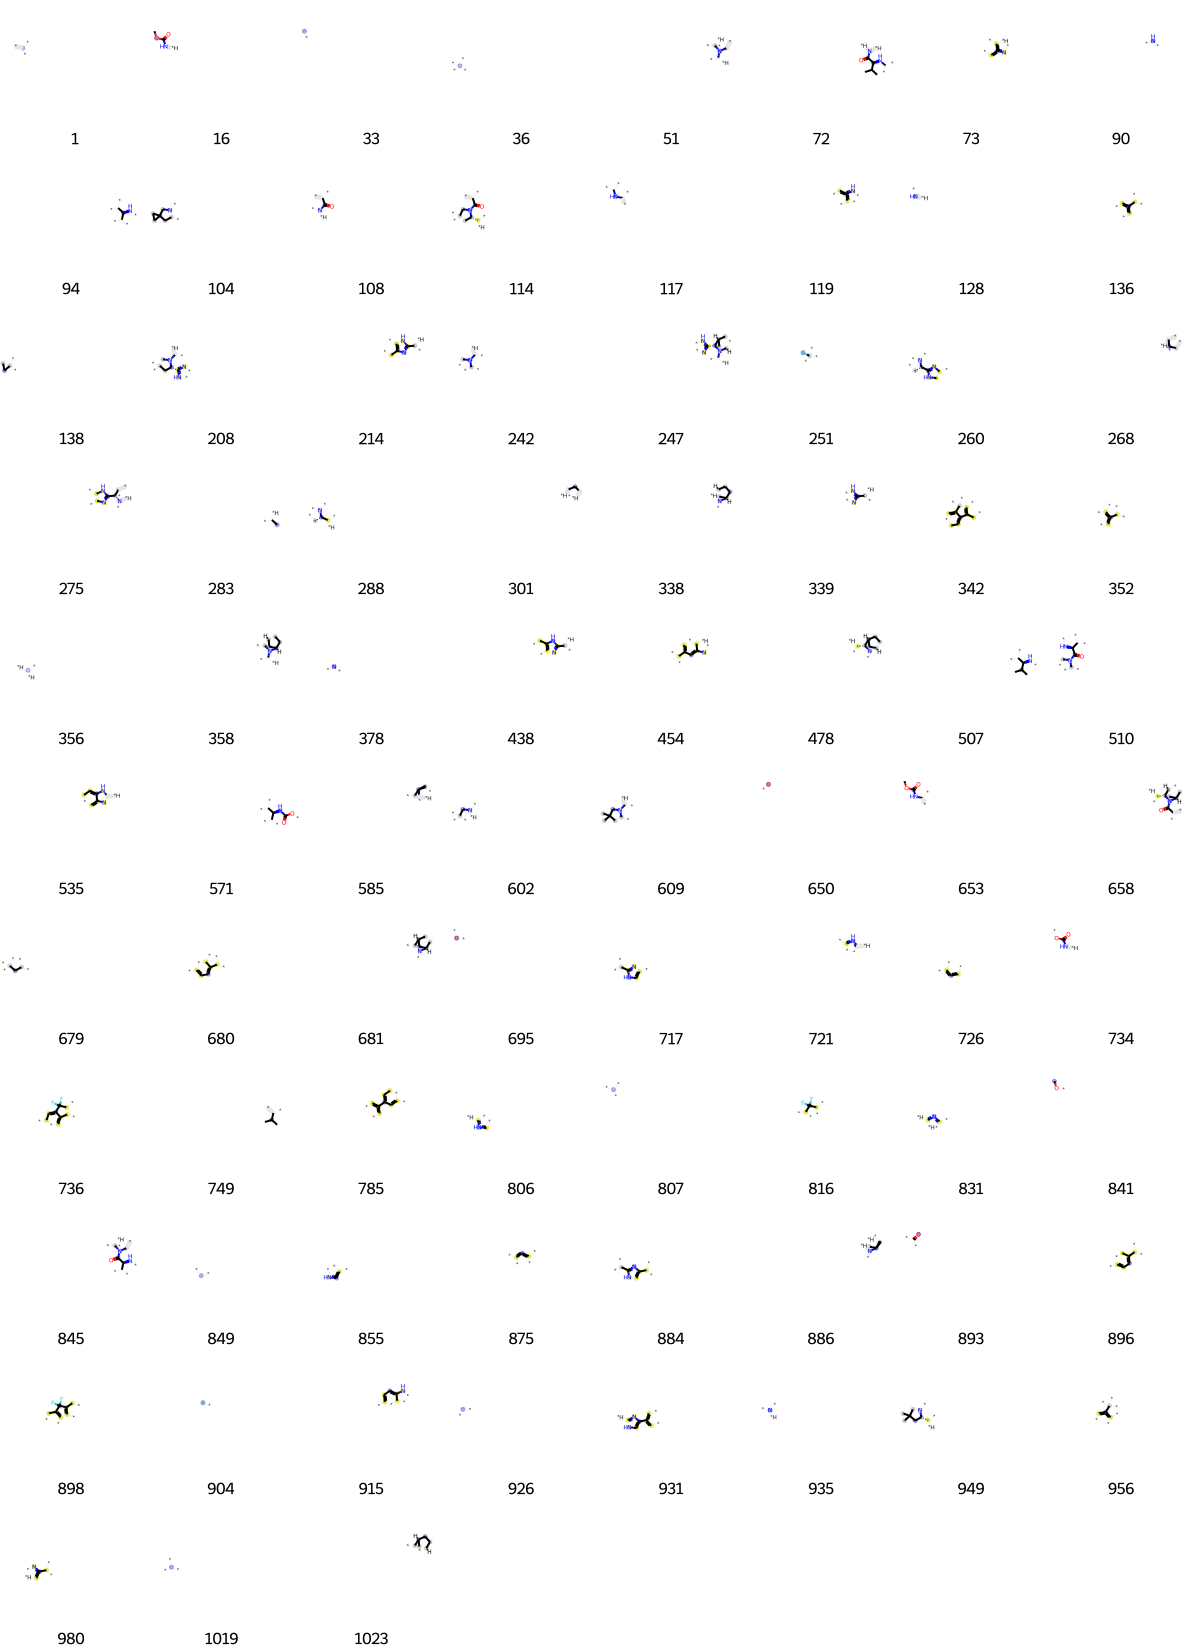

In [854]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [855]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33, 80, 89, 97, 110, 116, 147, 214, 294, 295, 402, 630, 695, 698, 807, 995]

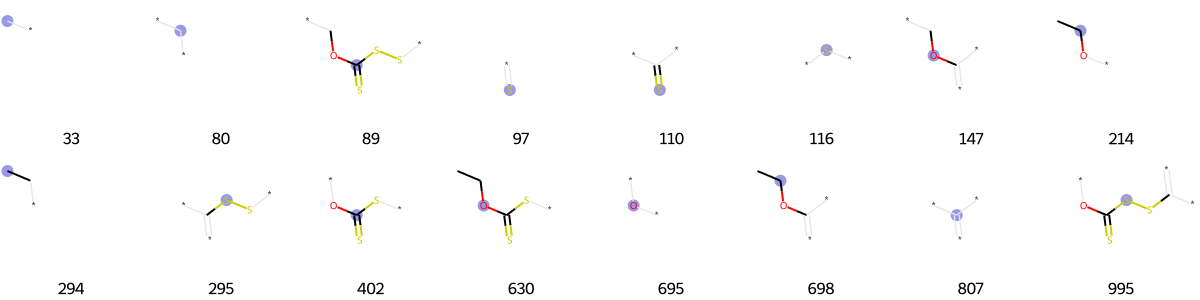

In [856]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [857]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[26,
 33,
 36,
 64,
 71,
 105,
 136,
 138,
 144,
 163,
 175,
 182,
 233,
 250,
 260,
 268,
 301,
 324,
 350,
 356,
 389,
 453,
 500,
 519,
 522,
 528,
 529,
 590,
 598,
 622,
 726,
 736,
 757,
 775,
 807,
 849,
 860,
 913,
 926,
 927,
 956,
 987,
 1019]

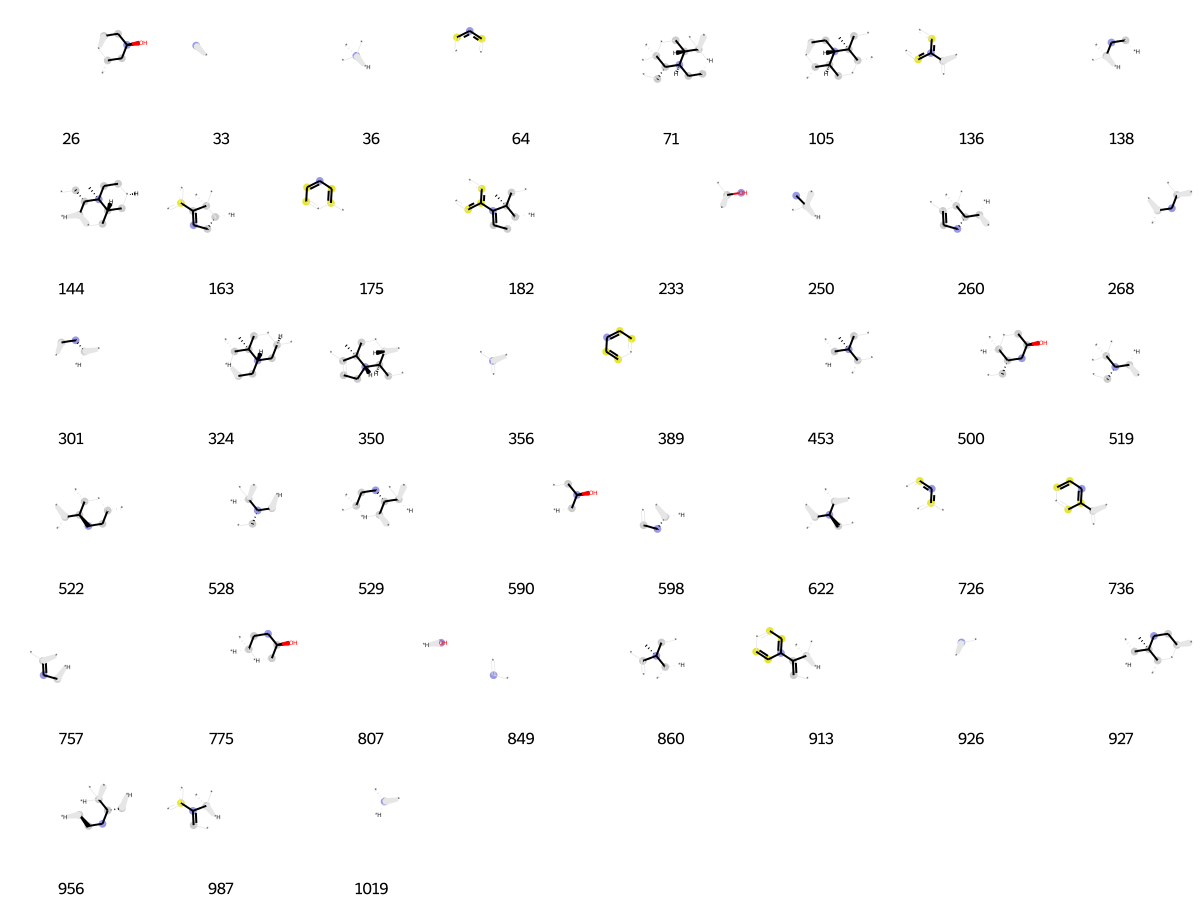

In [858]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [859]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[19,
 33,
 64,
 80,
 94,
 126,
 140,
 189,
 214,
 229,
 237,
 285,
 294,
 333,
 350,
 356,
 378,
 392,
 425,
 428,
 448,
 452,
 489,
 549,
 640,
 650,
 695,
 700,
 715,
 726,
 827,
 842,
 849,
 915,
 936,
 946]

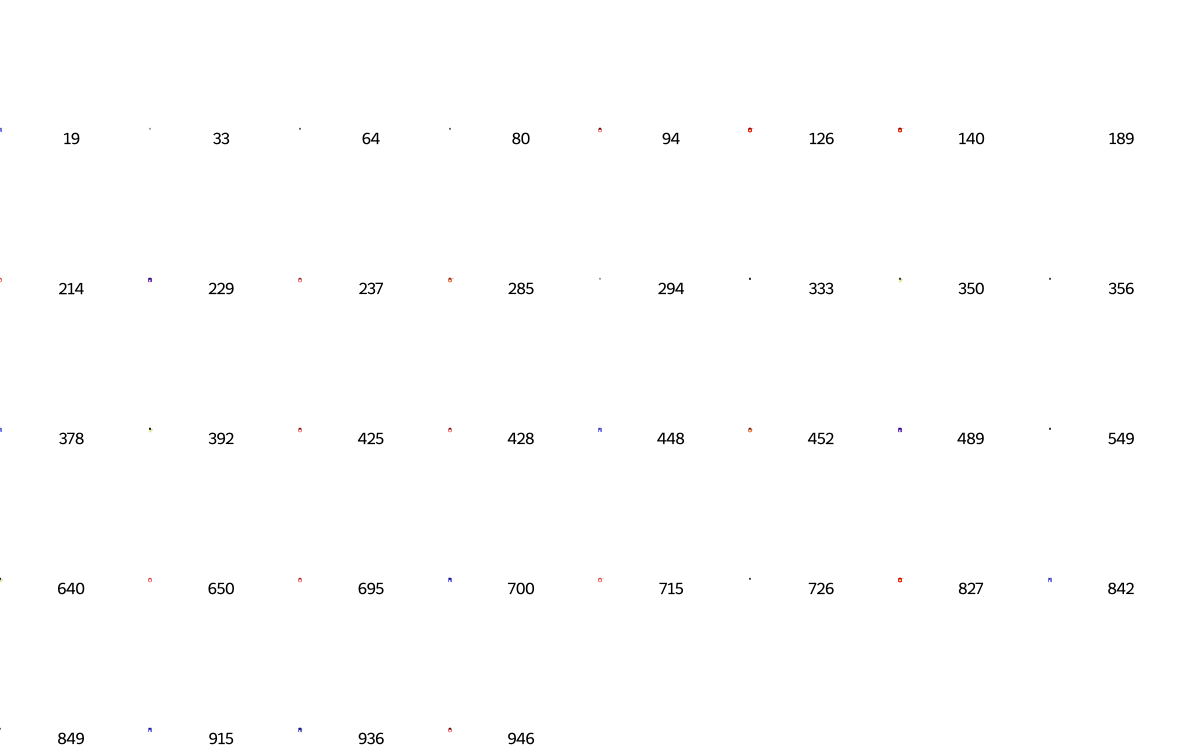

In [860]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [861]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[14,
 23,
 33,
 96,
 121,
 146,
 207,
 212,
 270,
 285,
 308,
 314,
 333,
 356,
 389,
 407,
 416,
 441,
 453,
 456,
 464,
 484,
 525,
 577,
 624,
 633,
 650,
 656,
 686,
 699,
 705,
 734,
 773,
 807,
 816,
 825,
 844,
 849,
 875,
 892,
 893,
 899,
 900,
 904,
 926,
 935,
 947,
 967,
 1019,
 1021]

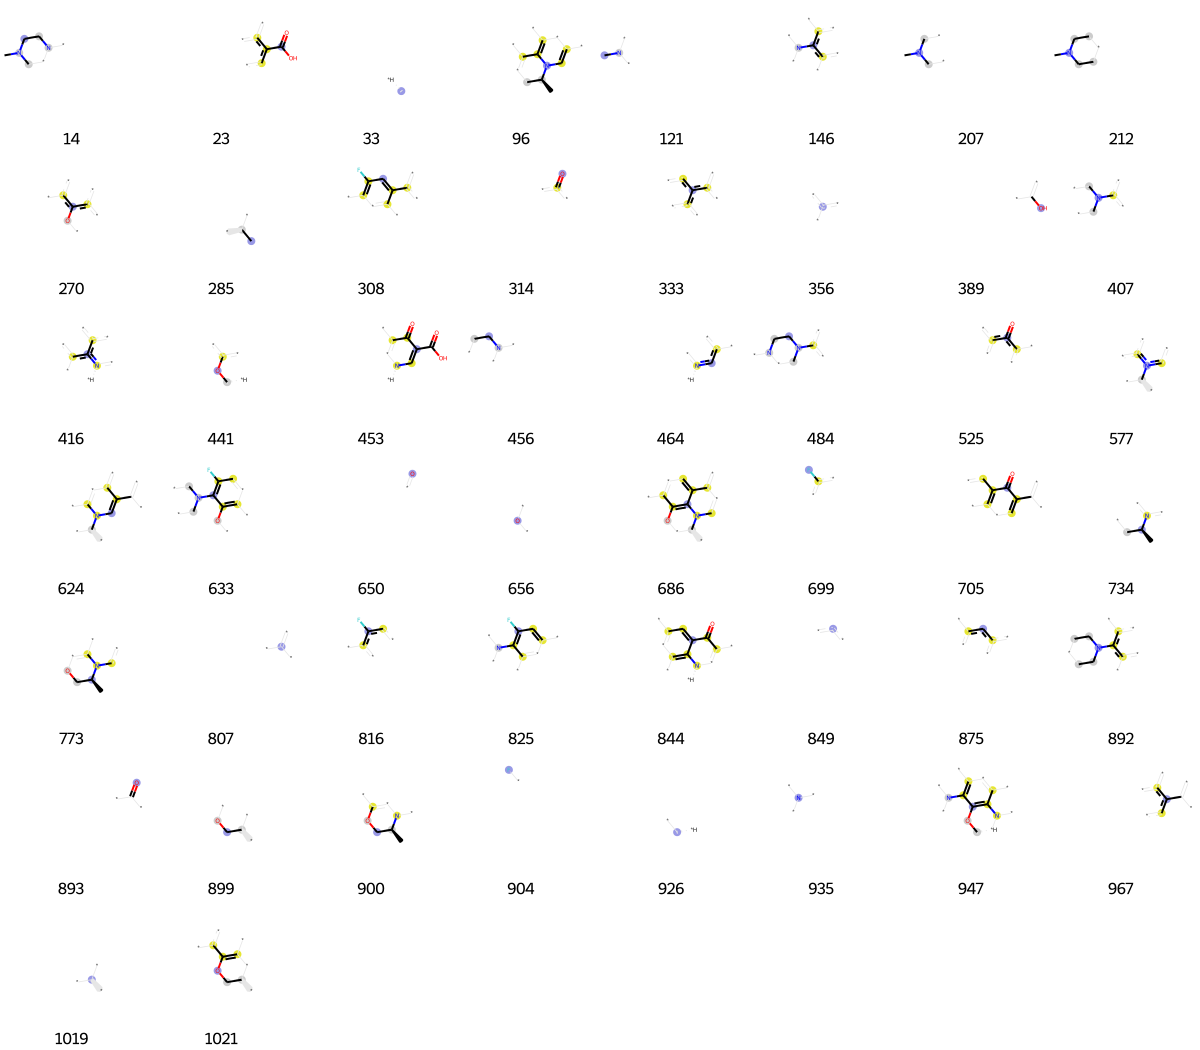

In [862]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [863]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 19,
 33,
 64,
 66,
 81,
 121,
 147,
 171,
 175,
 221,
 223,
 237,
 283,
 333,
 350,
 356,
 378,
 392,
 428,
 433,
 448,
 452,
 547,
 549,
 581,
 598,
 645,
 650,
 700,
 701,
 715,
 721,
 726,
 753,
 838,
 842,
 849,
 875,
 910,
 915,
 939,
 940,
 982,
 992,
 1013]

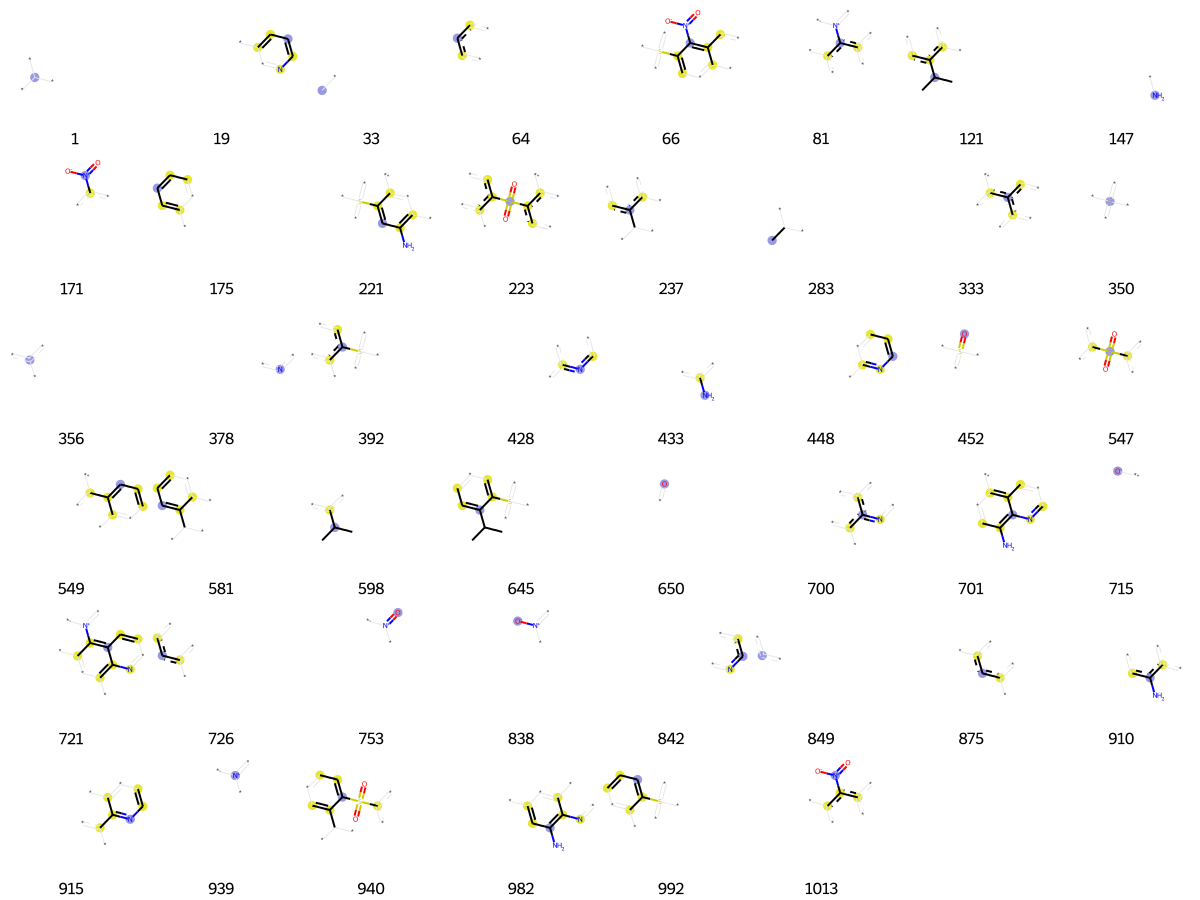

In [864]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])

In [865]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[8,
 33,
 57,
 80,
 94,
 128,
 197,
 235,
 249,
 251,
 252,
 253,
 293,
 294,
 319,
 350,
 356,
 452,
 486,
 512,
 514,
 586,
 620,
 643,
 650,
 667,
 692,
 695,
 715,
 726,
 738,
 807,
 841,
 849,
 875,
 881,
 888,
 893,
 927,
 932,
 946,
 957,
 967]

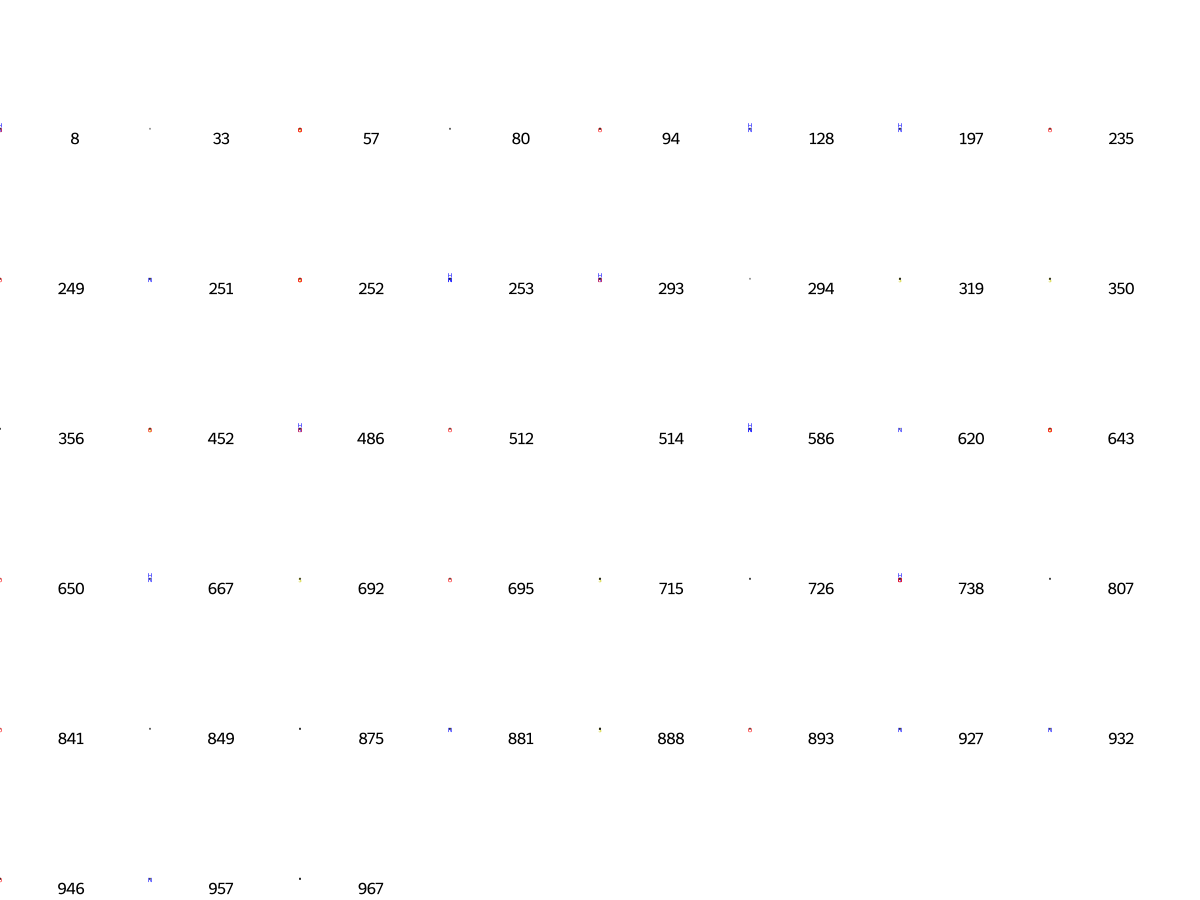

In [866]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [867]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[14,
 19,
 33,
 61,
 64,
 68,
 74,
 80,
 92,
 114,
 121,
 123,
 128,
 131,
 136,
 156,
 191,
 200,
 201,
 207,
 212,
 257,
 262,
 325,
 350,
 356,
 361,
 378,
 386,
 387,
 399,
 419,
 428,
 429,
 437,
 452,
 456,
 458,
 486,
 491,
 511,
 526,
 541,
 555,
 558,
 562,
 579,
 592,
 650,
 673,
 692,
 698,
 717,
 726,
 736,
 741,
 767,
 768,
 771,
 784,
 787,
 792,
 795,
 807,
 809,
 831,
 842,
 849,
 875,
 893,
 904,
 926,
 935,
 954,
 980,
 1008,
 1012]

In [868]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[1,
 2,
 4,
 33,
 39,
 50,
 51,
 64,
 108,
 117,
 128,
 136,
 140,
 175,
 193,
 219,
 242,
 283,
 287,
 299,
 301,
 323,
 354,
 356,
 378,
 384,
 389,
 406,
 446,
 451,
 456,
 471,
 488,
 514,
 531,
 558,
 573,
 599,
 610,
 615,
 624,
 650,
 668,
 675,
 689,
 692,
 726,
 736,
 792,
 807,
 849,
 883,
 890,
 893,
 896,
 926,
 935,
 944,
 954,
 989,
 1019]

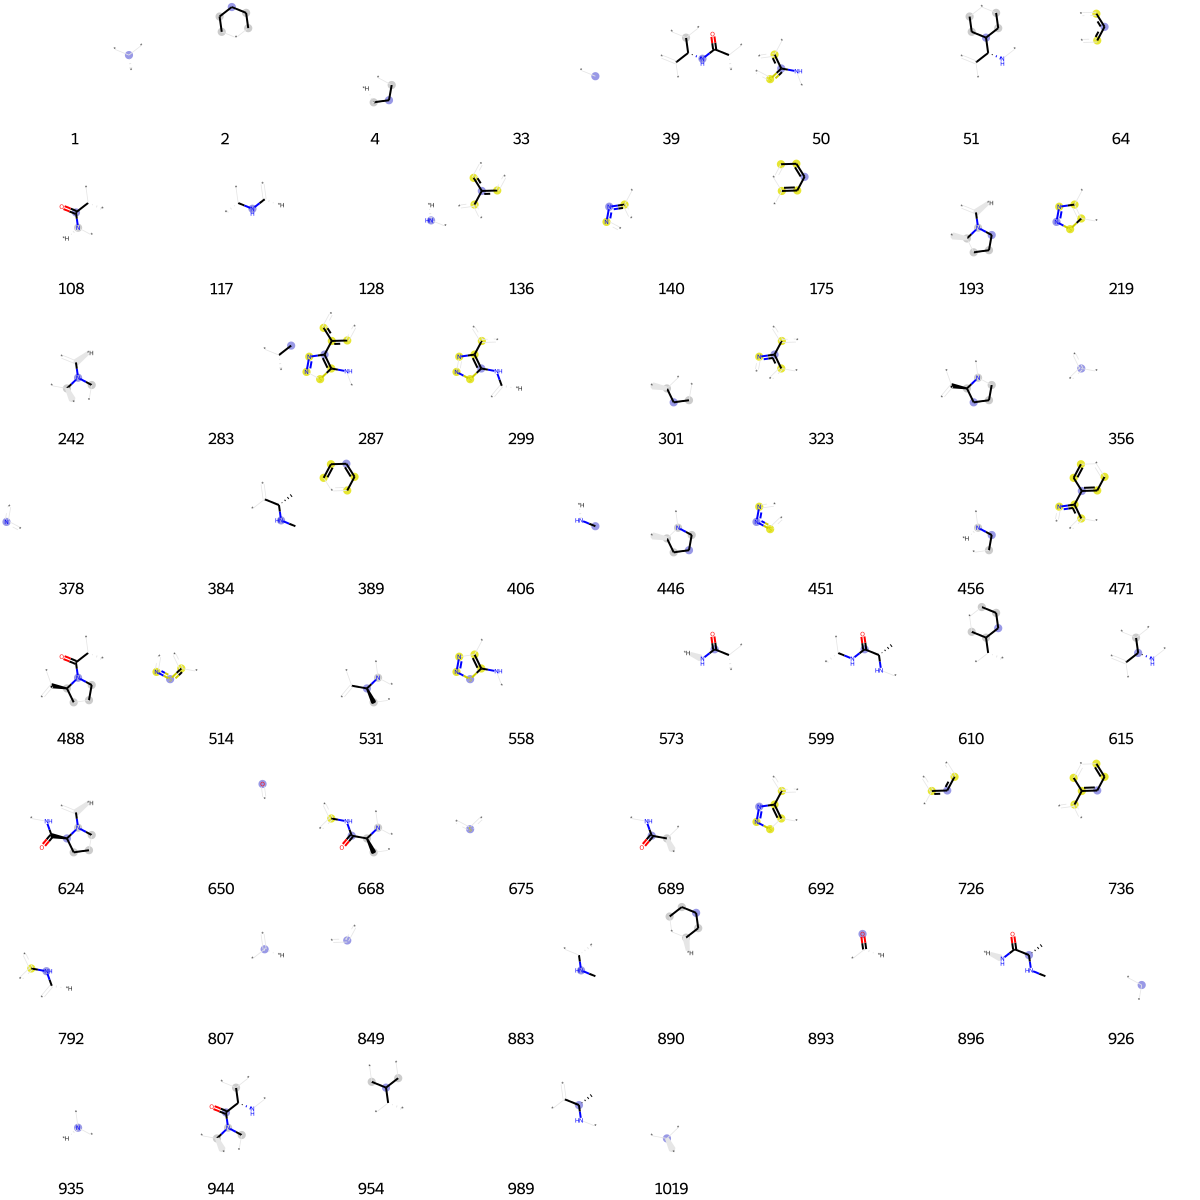

In [869]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [870]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[15,
 19,
 22,
 29,
 40,
 42,
 64,
 80,
 114,
 128,
 191,
 218,
 236,
 301,
 311,
 322,
 346,
 356,
 357,
 375,
 378,
 393,
 428,
 429,
 437,
 444,
 456,
 458,
 494,
 511,
 546,
 559,
 562,
 573,
 575,
 579,
 593,
 628,
 641,
 650,
 652,
 695,
 703,
 712,
 726,
 730,
 772,
 792,
 800,
 807,
 809,
 842,
 849,
 860,
 872,
 875,
 893,
 904,
 926,
 935,
 985,
 1019]

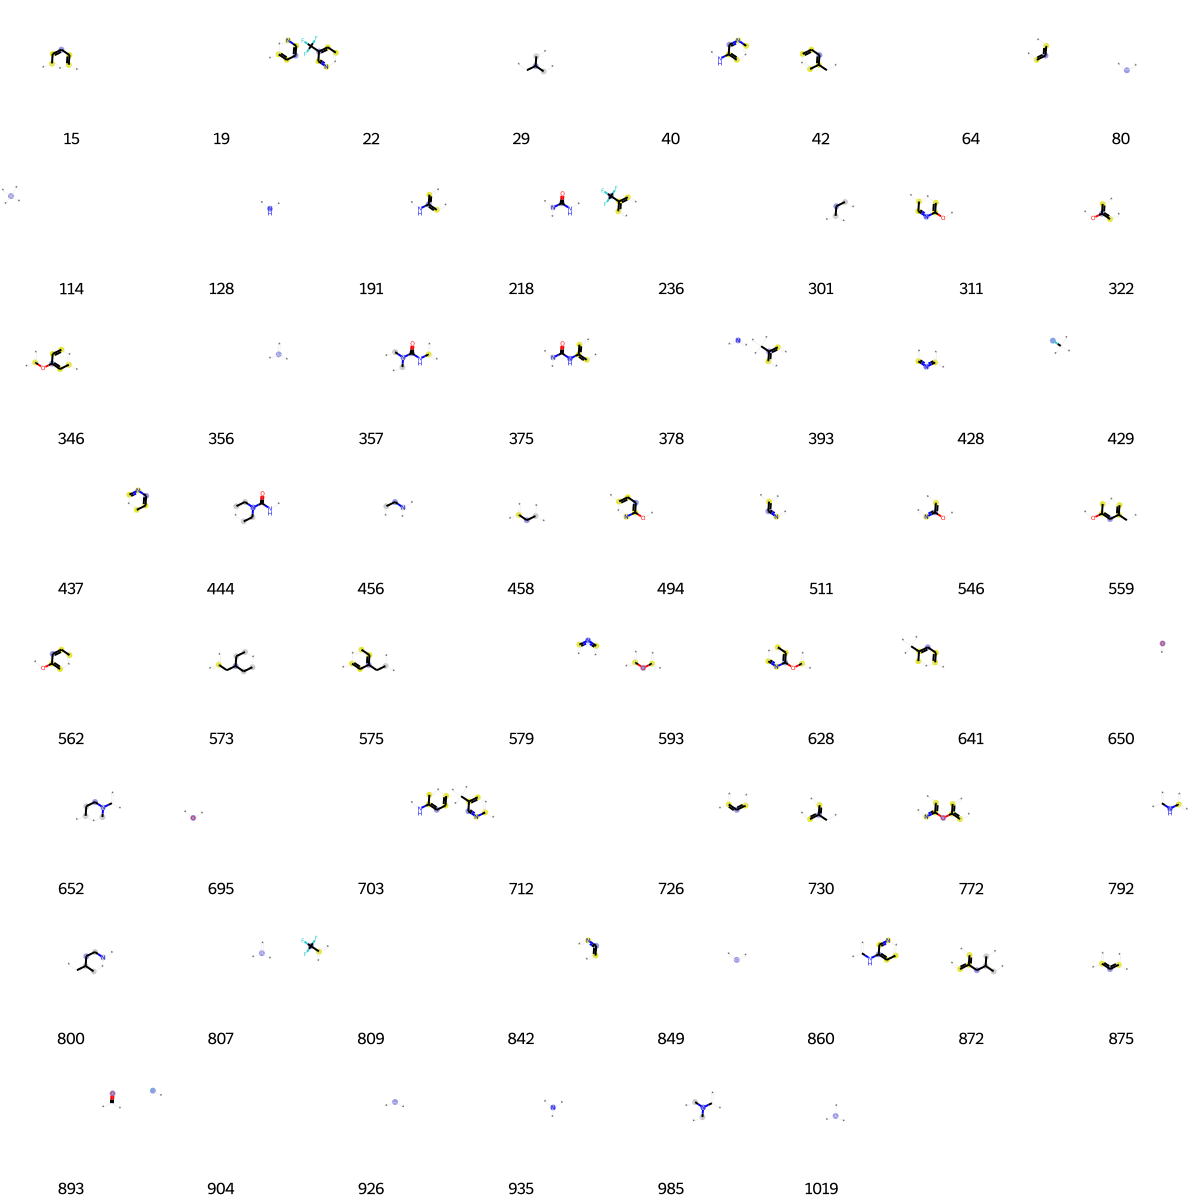

In [871]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [872]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[11,
 14,
 15,
 17,
 33,
 37,
 42,
 64,
 80,
 90,
 105,
 114,
 163,
 214,
 227,
 246,
 268,
 284,
 305,
 310,
 322,
 325,
 356,
 366,
 392,
 404,
 441,
 456,
 465,
 490,
 492,
 507,
 511,
 512,
 515,
 531,
 559,
 562,
 570,
 623,
 650,
 656,
 662,
 683,
 695,
 726,
 730,
 738,
 739,
 741,
 744,
 776,
 781,
 807,
 809,
 839,
 841,
 849,
 875,
 878,
 881,
 893,
 926,
 935,
 948,
 985,
 996,
 997,
 998,
 1019]

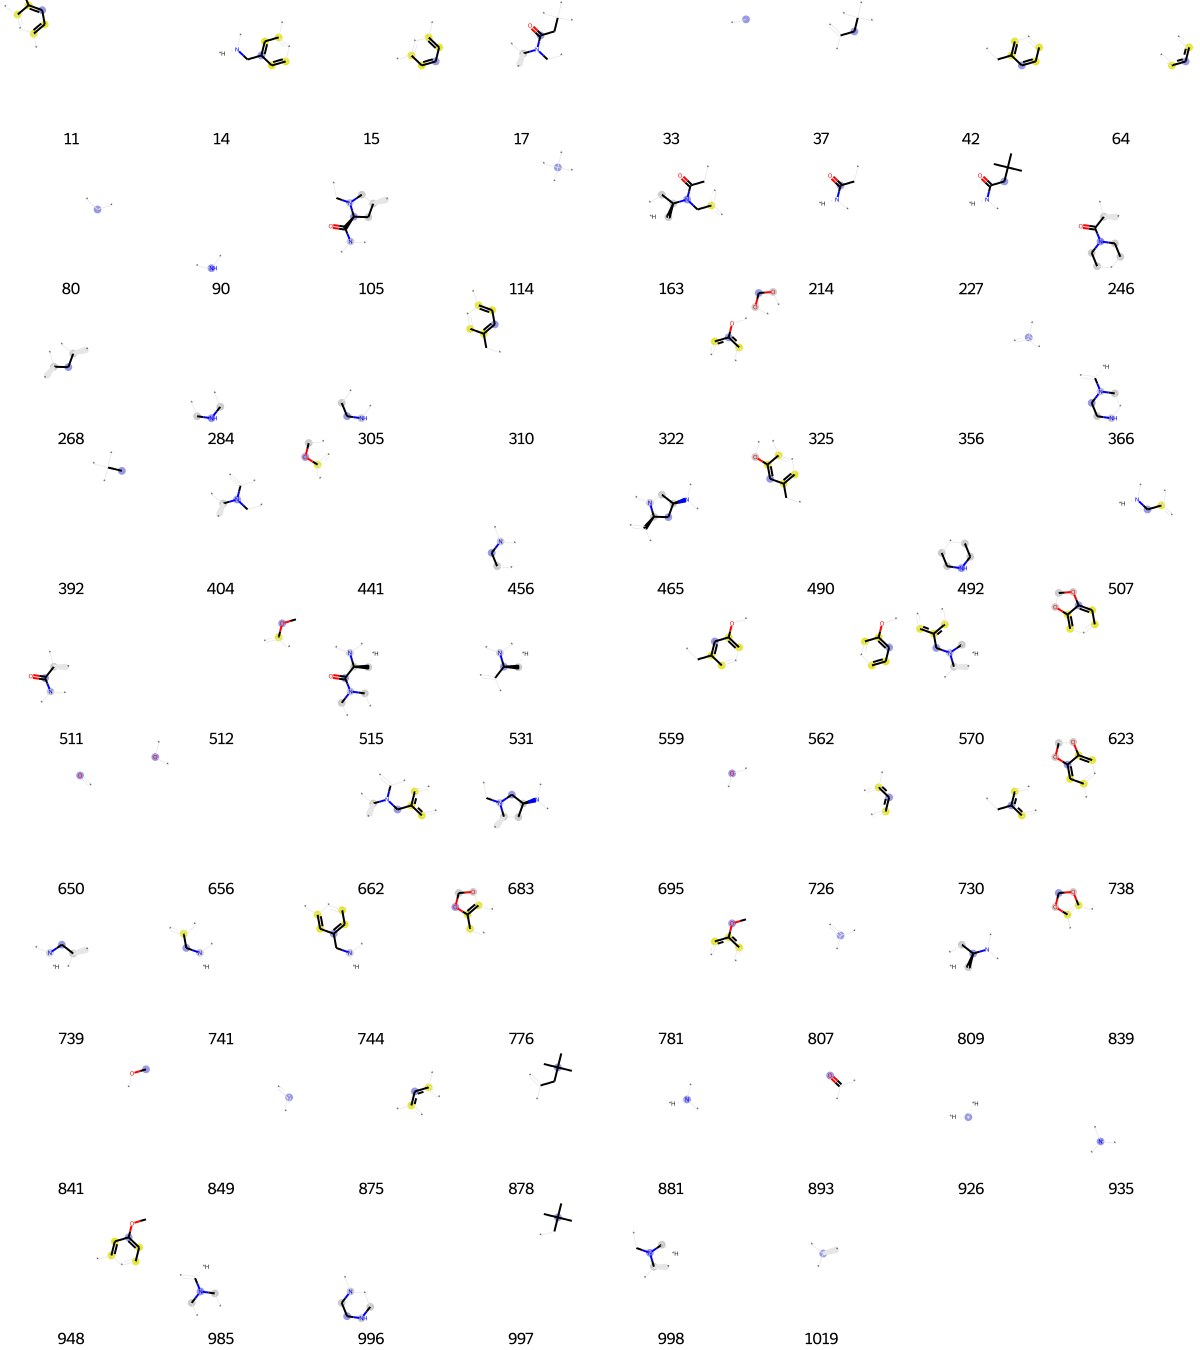

In [873]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [874]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[8,
 80,
 128,
 170,
 197,
 222,
 265,
 287,
 356,
 361,
 473,
 486,
 539,
 650,
 667,
 723,
 807,
 849,
 875,
 893]

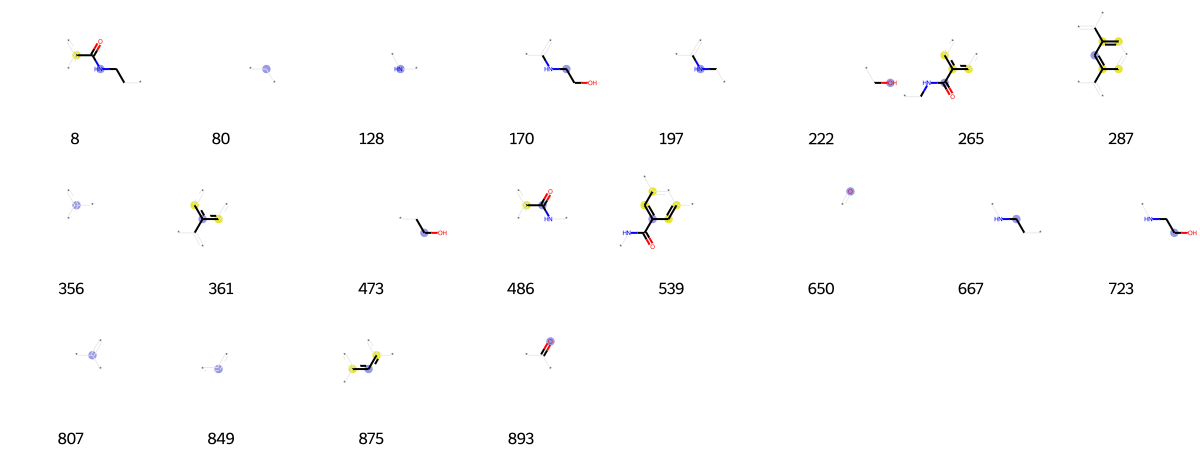

In [875]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [876]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 4,
 33,
 36,
 59,
 121,
 138,
 195,
 216,
 227,
 250,
 322,
 328,
 387,
 389,
 605,
 619,
 650,
 807,
 820,
 893,
 926,
 935,
 1004]

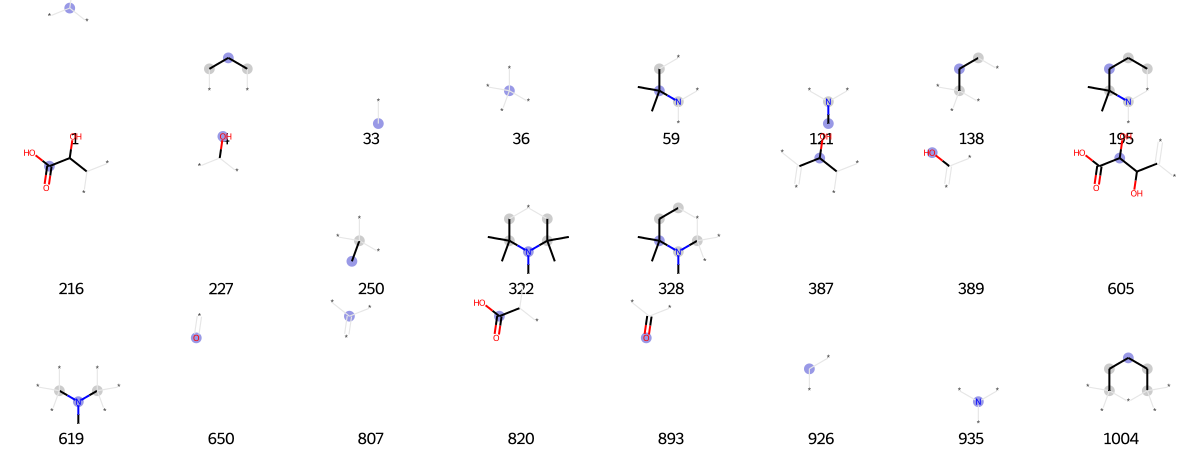

In [877]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [878]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[33,
 90,
 94,
 130,
 139,
 140,
 227,
 233,
 249,
 255,
 268,
 273,
 301,
 311,
 314,
 356,
 373,
 397,
 402,
 422,
 429,
 470,
 502,
 512,
 524,
 544,
 585,
 650,
 695,
 711,
 726,
 779,
 798,
 841,
 842,
 849,
 875,
 926,
 946,
 950,
 976,
 1014,
 1019,
 1023]

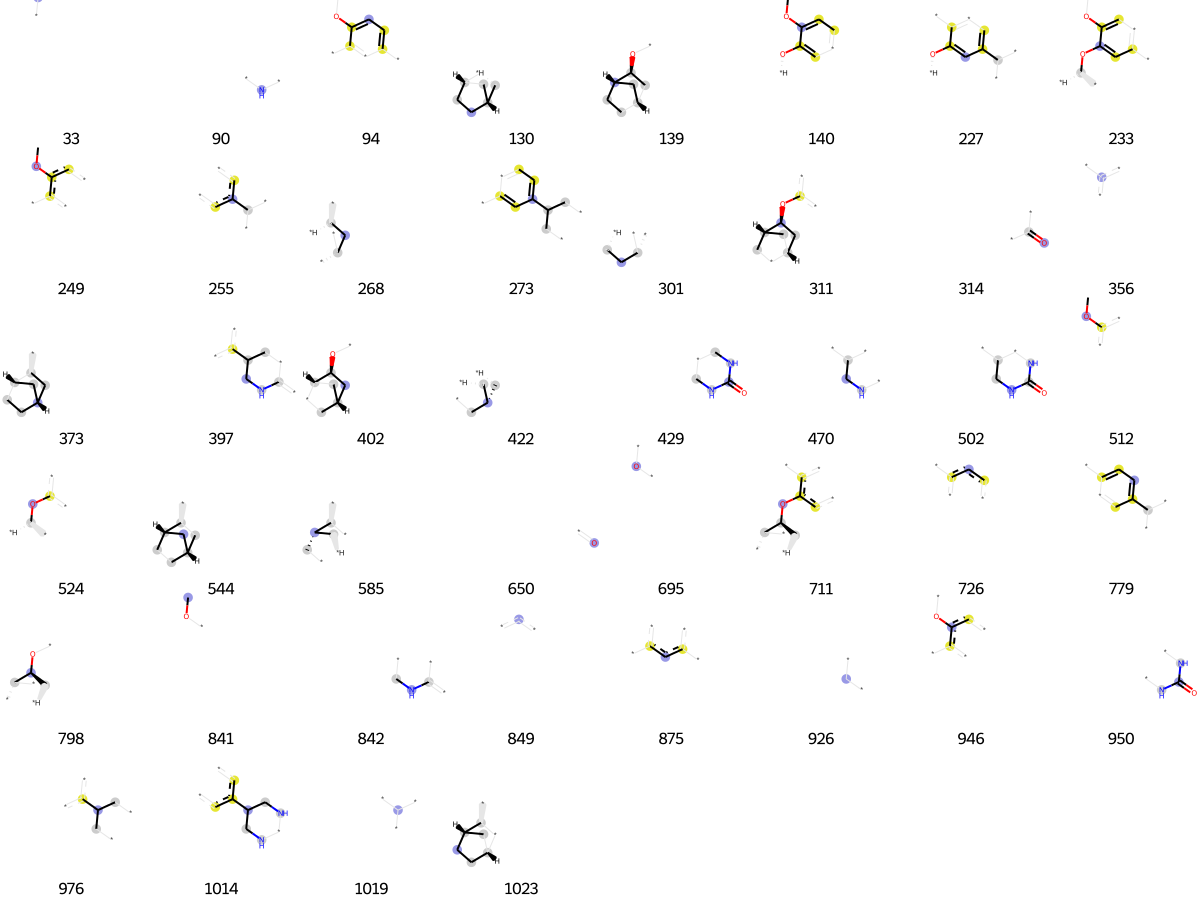

In [879]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [882]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[5,
 15,
 29,
 33,
 36,
 45,
 64,
 80,
 90,
 112,
 121,
 142,
 145,
 147,
 212,
 231,
 256,
 261,
 286,
 294,
 304,
 323,
 356,
 361,
 378,
 385,
 396,
 424,
 427,
 428,
 436,
 464,
 486,
 498,
 511,
 553,
 579,
 601,
 607,
 648,
 649,
 650,
 679,
 695,
 726,
 728,
 729,
 736,
 739,
 807,
 841,
 849,
 875,
 893,
 895,
 909,
 926,
 935,
 938,
 941,
 956,
 960,
 963,
 1019,
 1023]

In [884]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[15,
 32,
 33,
 61,
 64,
 75,
 84,
 85,
 119,
 128,
 151,
 179,
 201,
 232,
 245,
 301,
 325,
 335,
 339,
 356,
 378,
 407,
 456,
 491,
 527,
 552,
 650,
 667,
 673,
 695,
 698,
 702,
 707,
 726,
 792,
 807,
 827,
 828,
 831,
 841,
 849,
 853,
 875,
 879,
 883,
 893,
 926,
 932,
 935,
 937,
 959,
 971,
 980,
 1002,
 1017,
 1019]

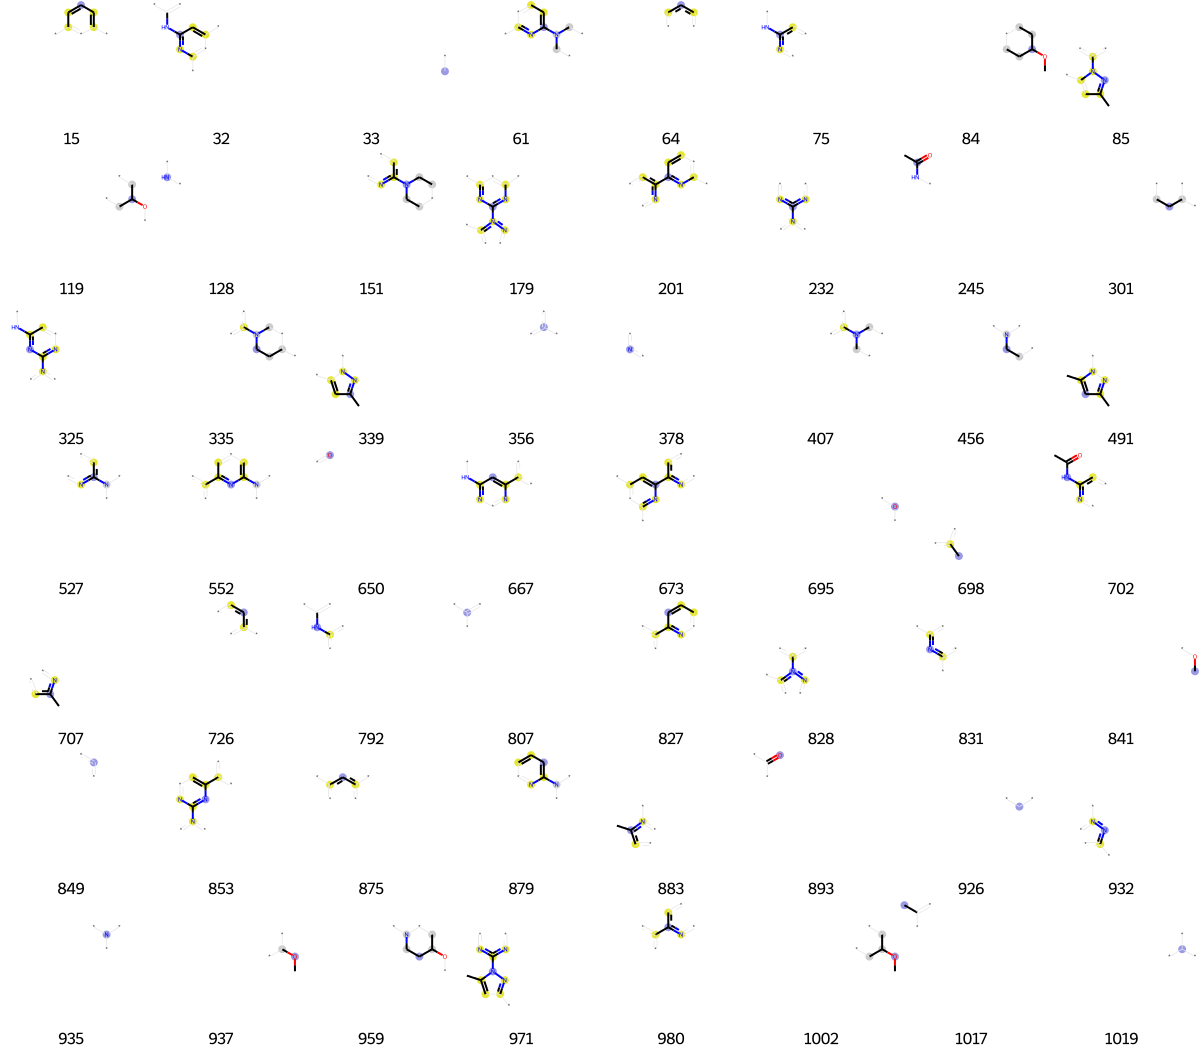

In [885]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [886]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 19,
 33,
 36,
 41,
 69,
 80,
 81,
 89,
 116,
 121,
 128,
 140,
 147,
 172,
 186,
 195,
 232,
 255,
 257,
 259,
 264,
 314,
 323,
 329,
 341,
 344,
 356,
 378,
 389,
 399,
 403,
 456,
 464,
 470,
 471,
 517,
 566,
 586,
 590,
 647,
 650,
 675,
 695,
 723,
 747,
 759,
 762,
 786,
 807,
 820,
 824,
 825,
 841,
 859,
 872,
 882,
 893,
 898,
 899,
 926,
 935,
 936,
 953,
 960,
 983,
 998,
 1019]

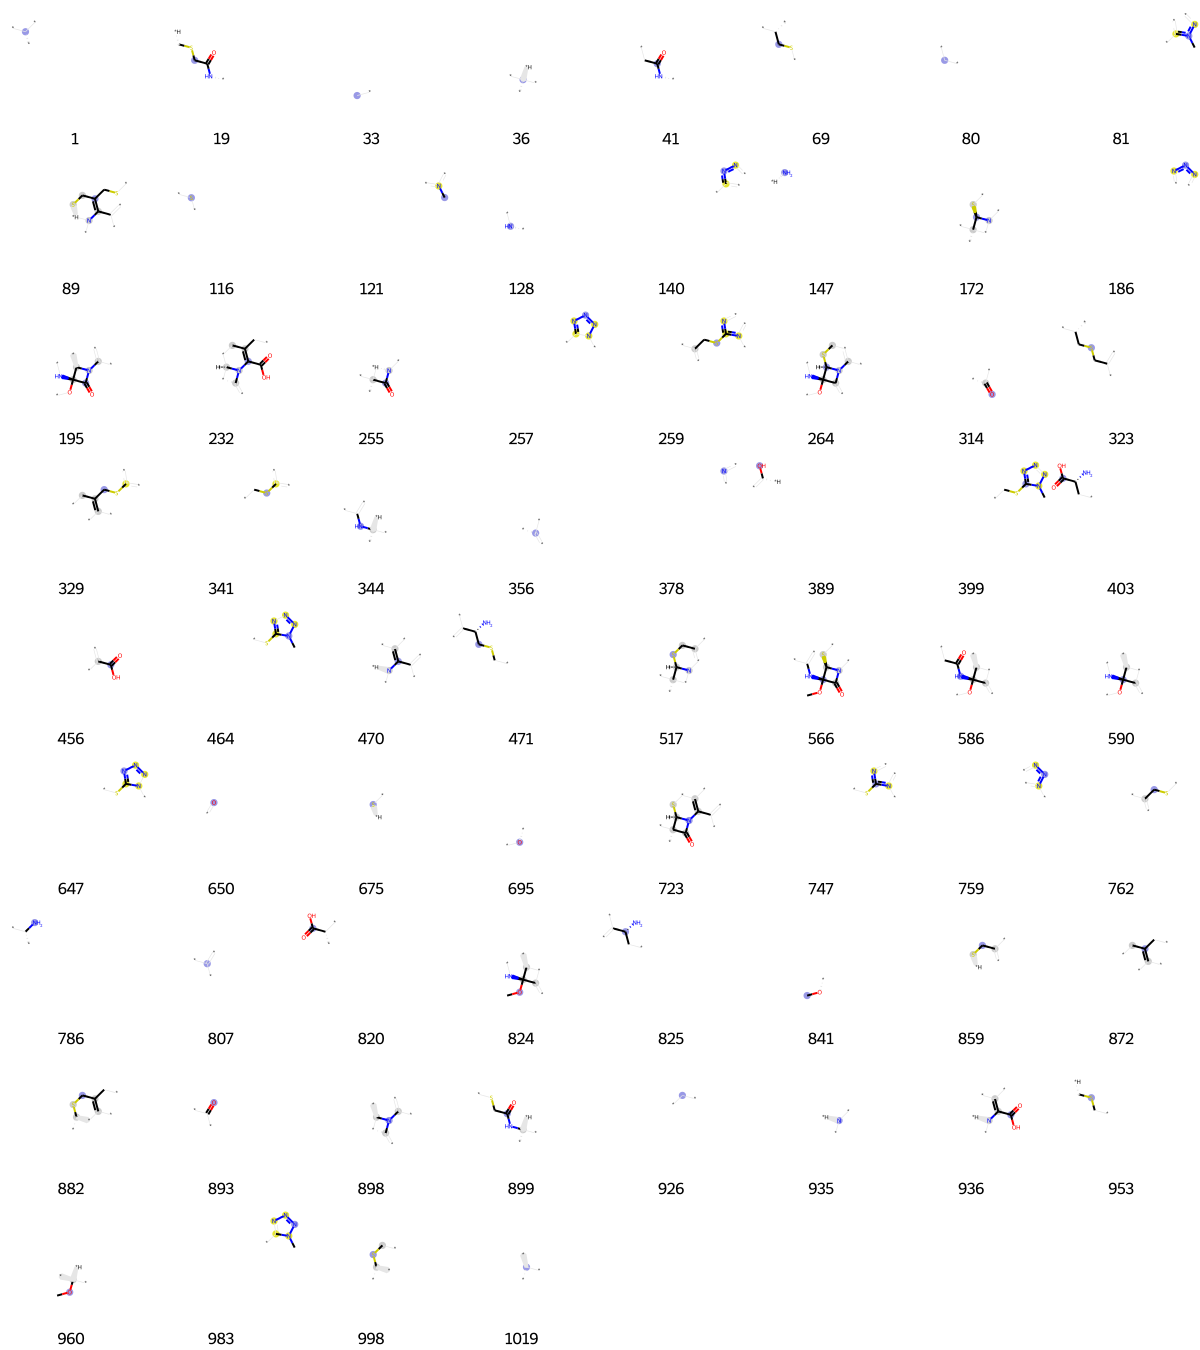

In [887]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [888]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[13,
 42,
 64,
 80,
 90,
 121,
 175,
 219,
 301,
 314,
 356,
 378,
 389,
 428,
 488,
 575,
 625,
 632,
 695,
 713,
 724,
 726,
 730,
 734,
 745,
 774,
 849,
 855,
 860,
 887,
 931,
 968,
 1018]

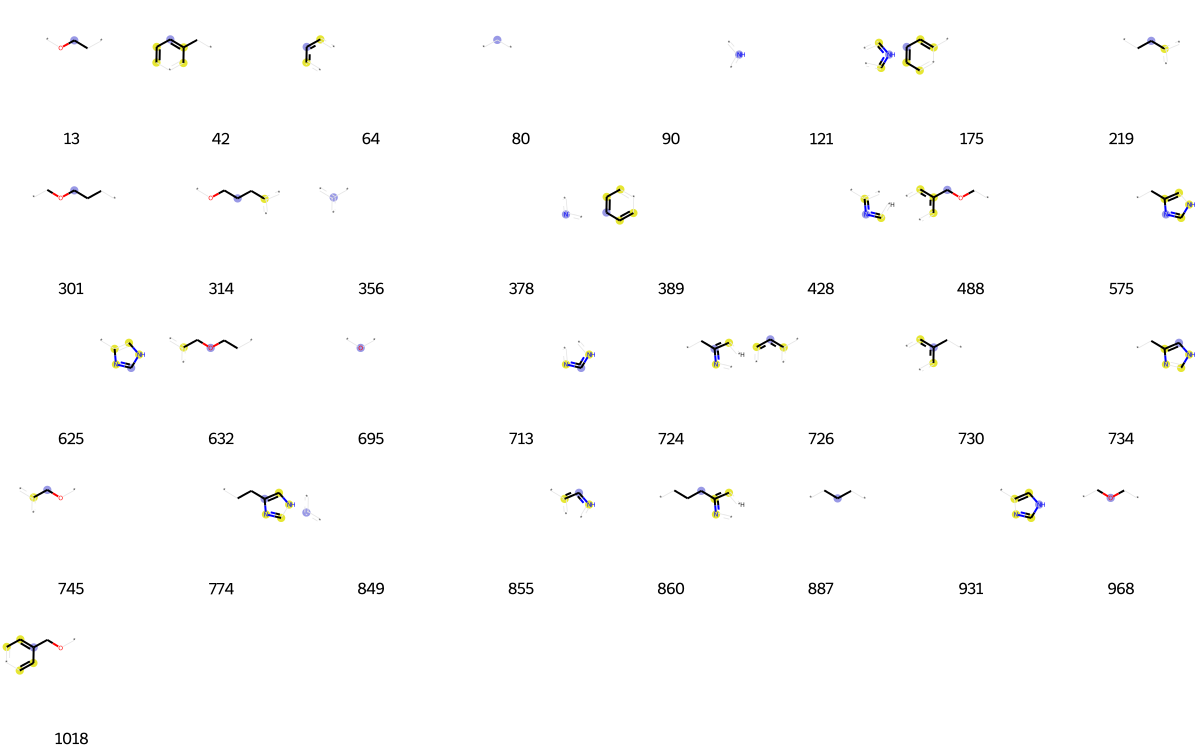

In [889]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [890]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33,
 128,
 145,
 289,
 356,
 361,
 578,
 606,
 650,
 673,
 691,
 695,
 726,
 745,
 754,
 807,
 841,
 849,
 893,
 906]

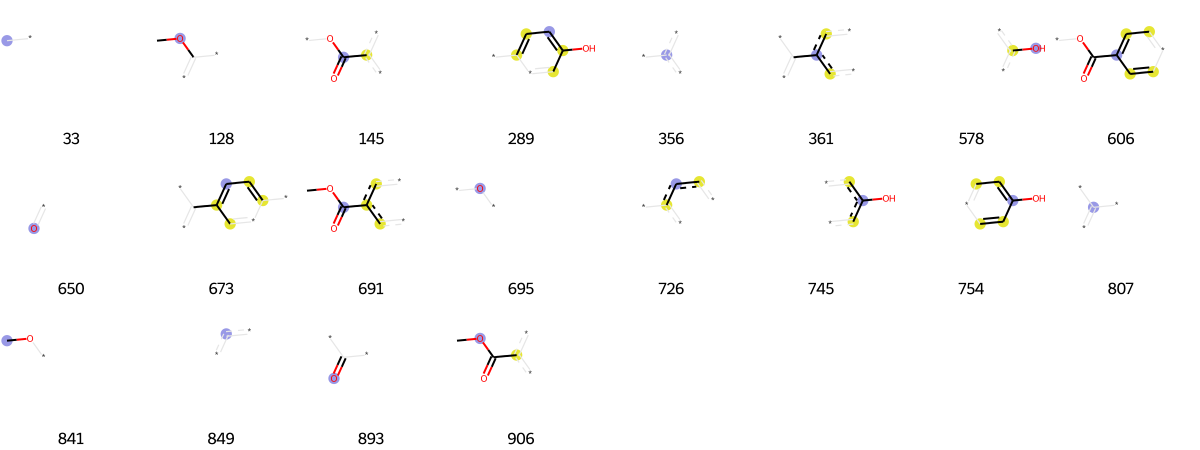

In [891]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [892]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[9,
 71,
 75,
 80,
 128,
 147,
 152,
 185,
 194,
 210,
 222,
 233,
 313,
 356,
 378,
 418,
 428,
 433,
 435,
 454,
 463,
 492,
 519,
 561,
 577,
 610,
 656,
 659,
 672,
 677,
 700,
 740,
 807,
 820,
 831,
 849,
 897,
 930,
 932,
 935,
 1019]

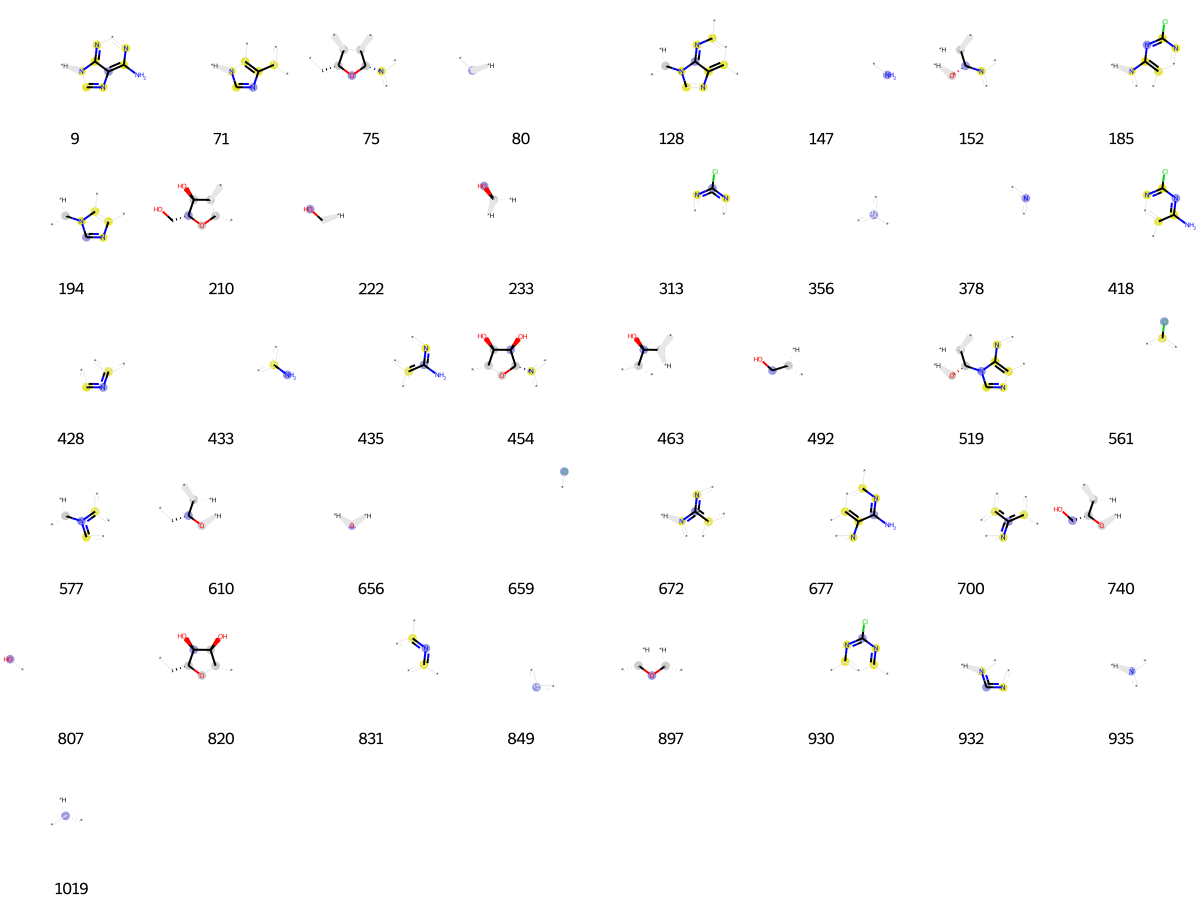

In [893]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [894]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[19,
 24,
 46,
 64,
 80,
 97,
 114,
 128,
 136,
 142,
 197,
 213,
 216,
 231,
 255,
 257,
 265,
 325,
 356,
 361,
 378,
 383,
 401,
 428,
 429,
 448,
 477,
 486,
 487,
 511,
 561,
 573,
 579,
 650,
 659,
 695,
 726,
 806,
 807,
 809,
 813,
 816,
 842,
 849,
 875,
 893,
 896,
 904,
 938,
 940,
 973,
 991,
 997]

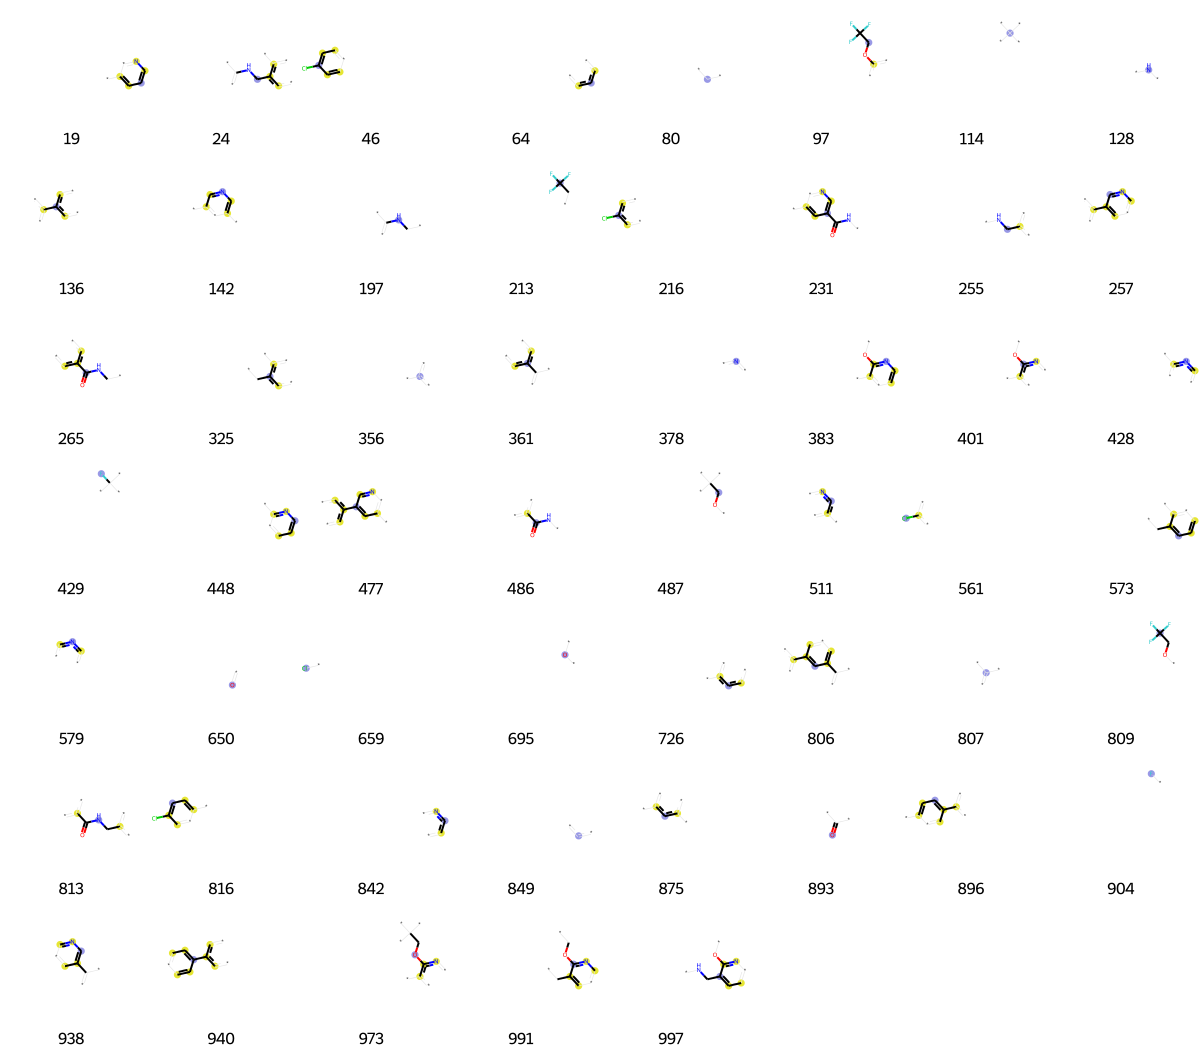

In [895]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [896]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[8,
 14,
 15,
 33,
 64,
 73,
 90,
 111,
 119,
 121,
 147,
 180,
 207,
 212,
 233,
 247,
 275,
 314,
 343,
 356,
 373,
 378,
 407,
 433,
 456,
 484,
 496,
 523,
 585,
 620,
 650,
 687,
 699,
 721,
 723,
 726,
 750,
 759,
 788,
 801,
 816,
 830,
 831,
 849,
 863,
 875,
 904,
 924,
 926,
 931,
 935,
 943,
 960,
 961]

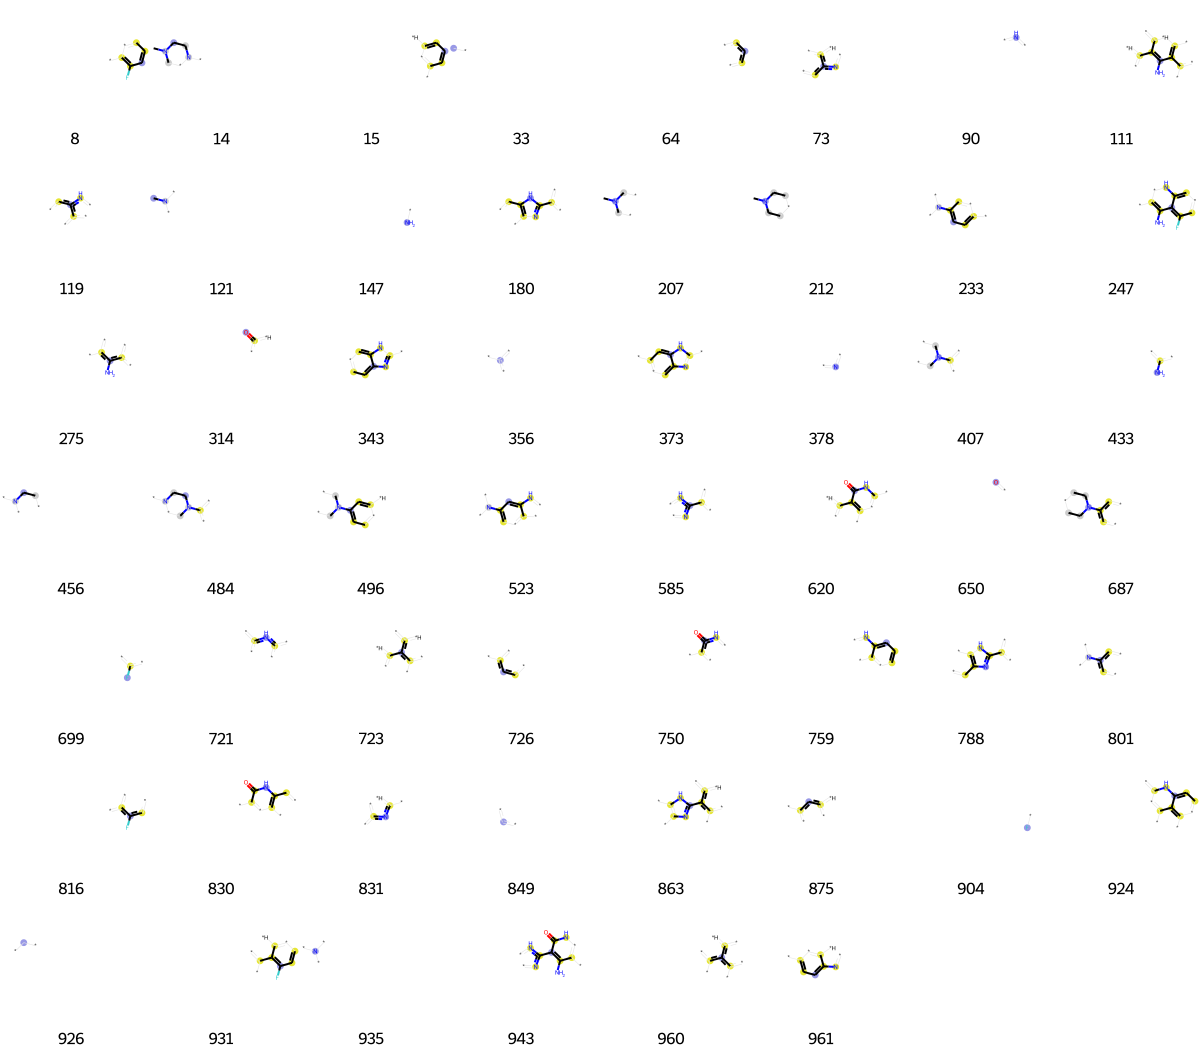

In [897]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [898]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[9,
 15,
 33,
 45,
 64,
 80,
 89,
 106,
 121,
 219,
 222,
 253,
 271,
 314,
 321,
 325,
 333,
 352,
 356,
 367,
 373,
 400,
 416,
 473,
 503,
 549,
 564,
 641,
 650,
 662,
 680,
 698,
 717,
 726,
 771,
 782,
 804,
 807,
 822,
 849,
 875,
 879,
 887,
 935,
 960,
 966,
 974,
 984,
 993]

In [901]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[54,
 64,
 136,
 157,
 167,
 171,
 175,
 177,
 202,
 218,
 285,
 314,
 356,
 389,
 472,
 501,
 525,
 578,
 580,
 583,
 585,
 650,
 656,
 726,
 736,
 745,
 784,
 807,
 849,
 875,
 897,
 960,
 1004]

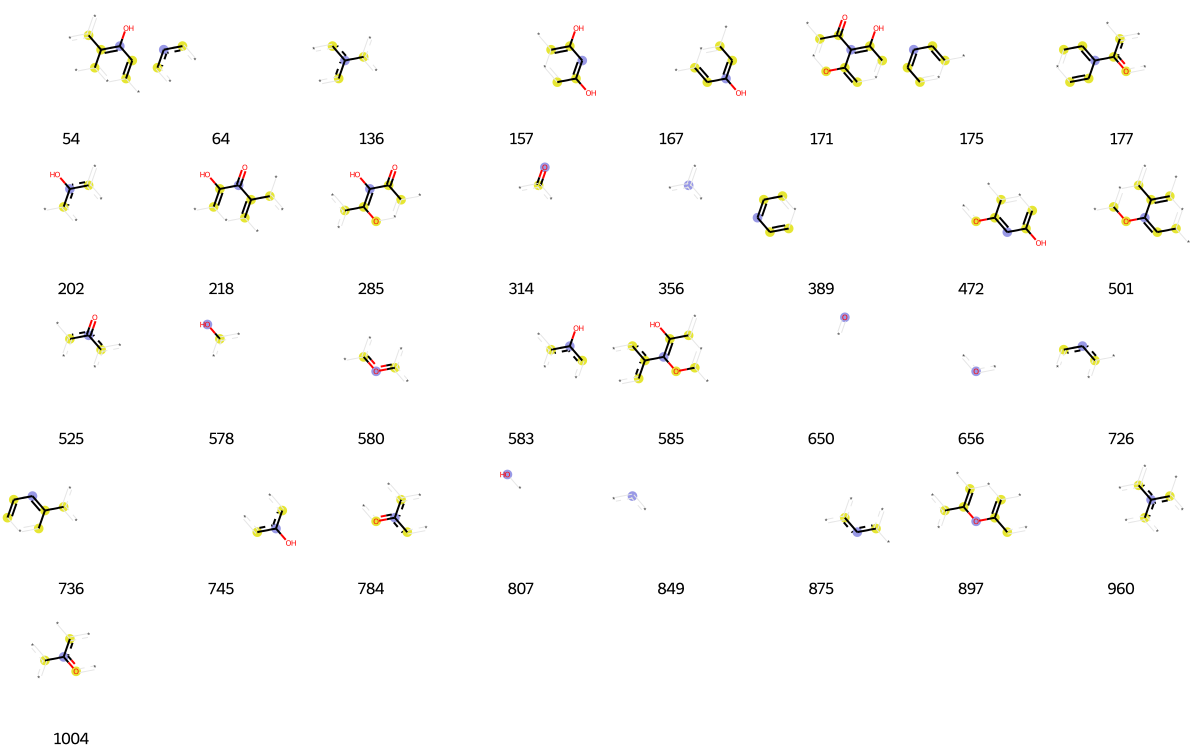

In [902]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [903]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[11,
 80,
 90,
 112,
 155,
 226,
 243,
 255,
 272,
 284,
 301,
 305,
 322,
 325,
 356,
 366,
 386,
 428,
 441,
 455,
 470,
 477,
 623,
 646,
 649,
 656,
 695,
 699,
 718,
 726,
 738,
 749,
 755,
 776,
 779,
 804,
 839,
 849,
 875,
 881,
 904,
 926,
 1010,
 1019]

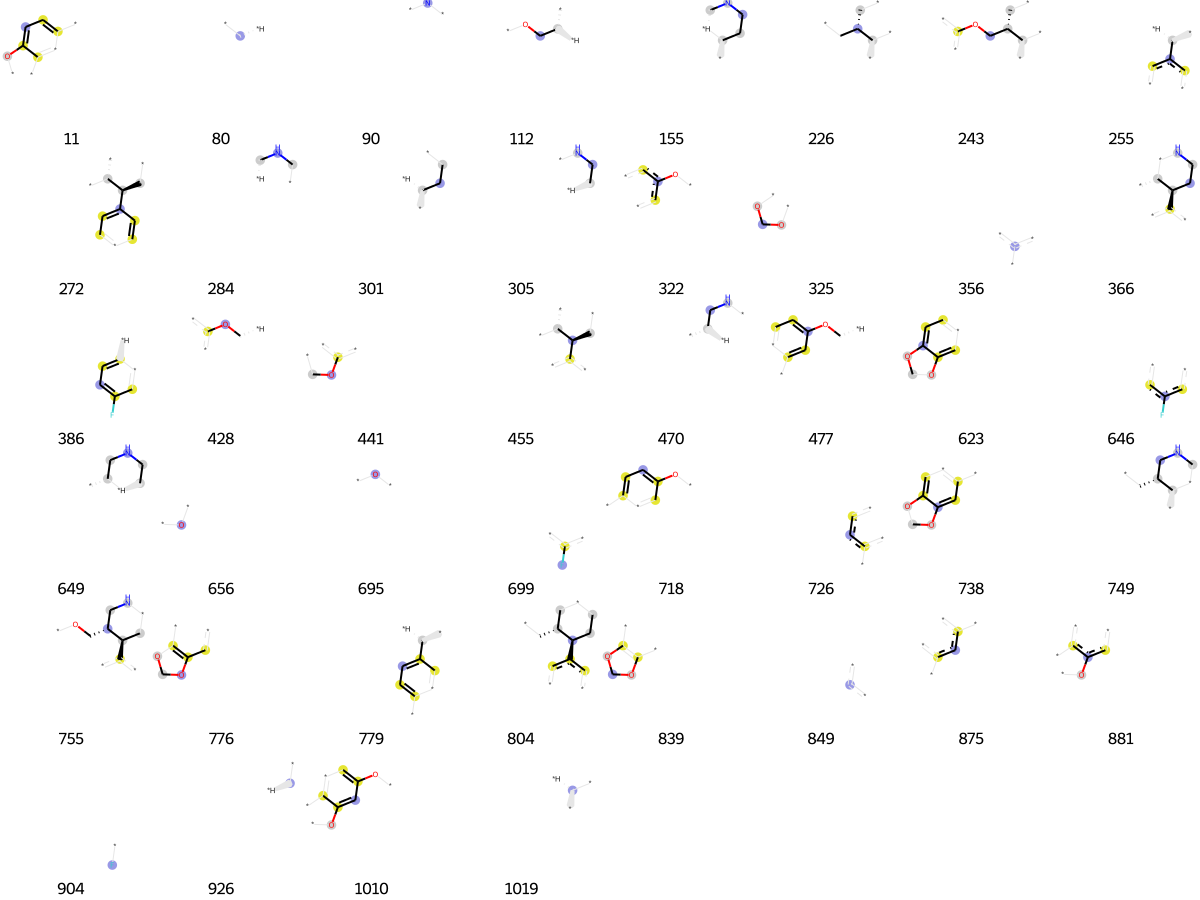

In [904]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [905]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[23,
 90,
 314,
 349,
 356,
 650,
 699,
 721,
 750,
 755,
 806,
 816,
 849,
 852,
 855,
 904,
 953,
 980,
 1008]

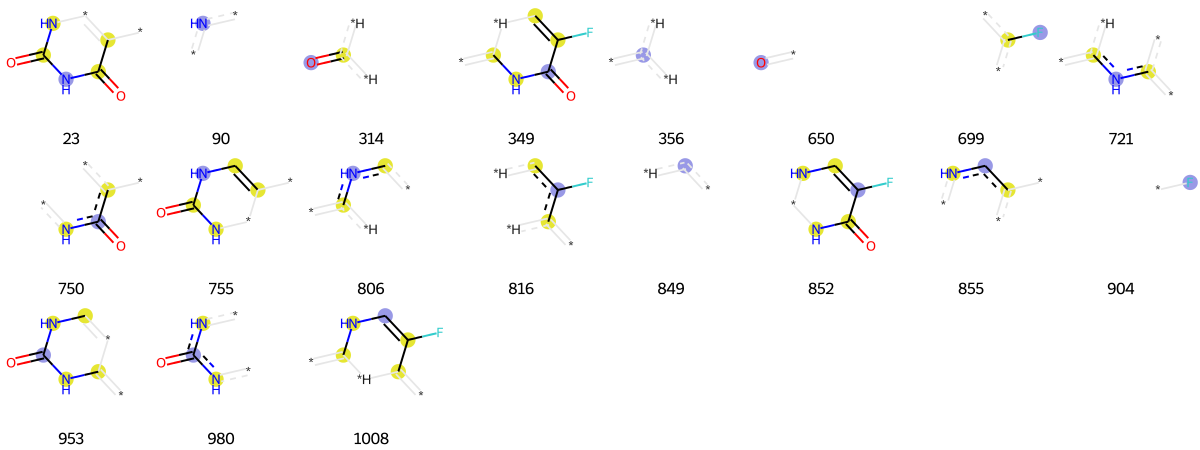

In [906]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [907]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[15,
 25,
 42,
 45,
 64,
 74,
 80,
 90,
 114,
 119,
 121,
 175,
 236,
 261,
 286,
 293,
 314,
 356,
 393,
 407,
 417,
 429,
 456,
 458,
 484,
 496,
 498,
 563,
 575,
 650,
 687,
 721,
 726,
 758,
 759,
 767,
 801,
 802,
 809,
 849,
 875,
 904,
 926,
 935,
 987,
 991,
 993]

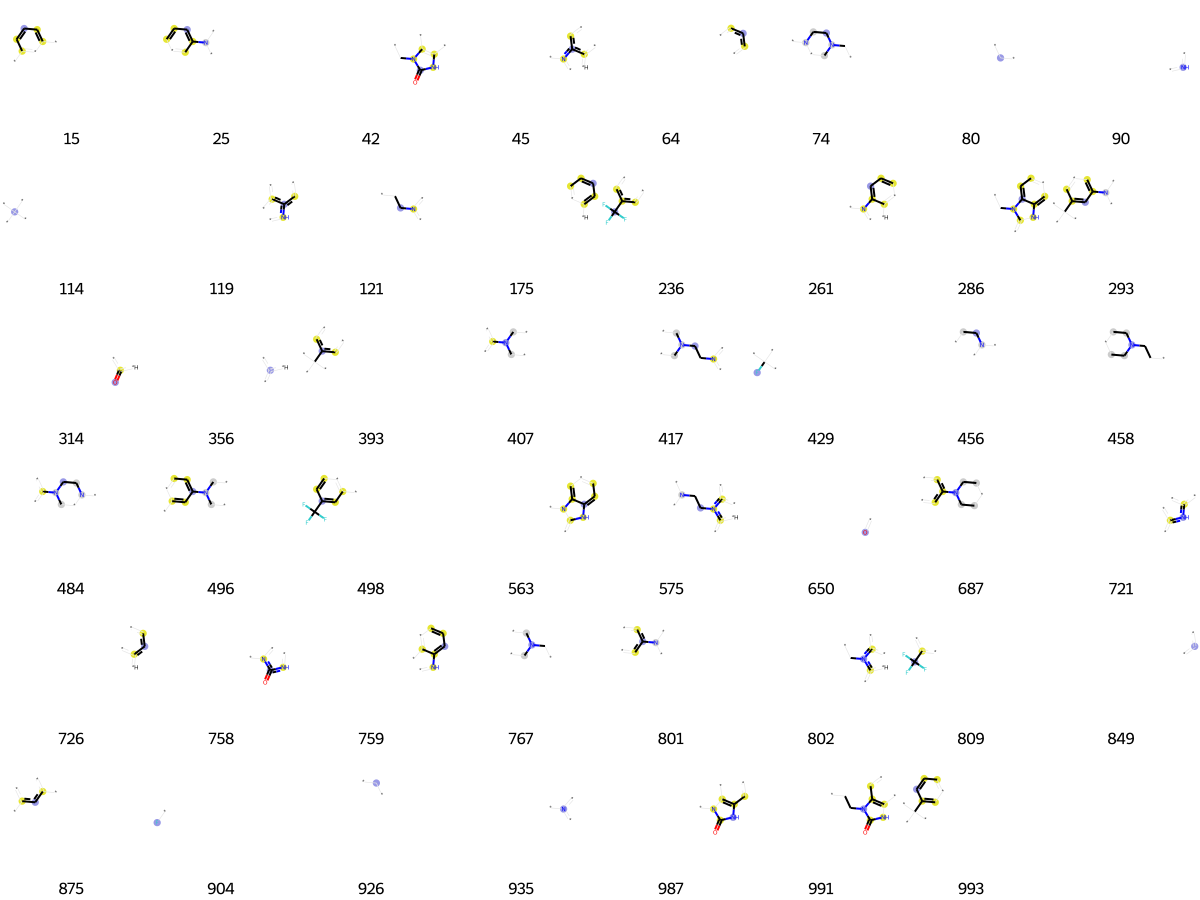

In [908]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [909]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 9,
 33,
 47,
 64,
 73,
 80,
 117,
 128,
 136,
 175,
 202,
 289,
 291,
 294,
 323,
 333,
 339,
 341,
 356,
 378,
 389,
 404,
 435,
 441,
 460,
 471,
 486,
 520,
 549,
 557,
 578,
 586,
 650,
 706,
 726,
 736,
 807,
 831,
 849,
 893,
 965,
 982]

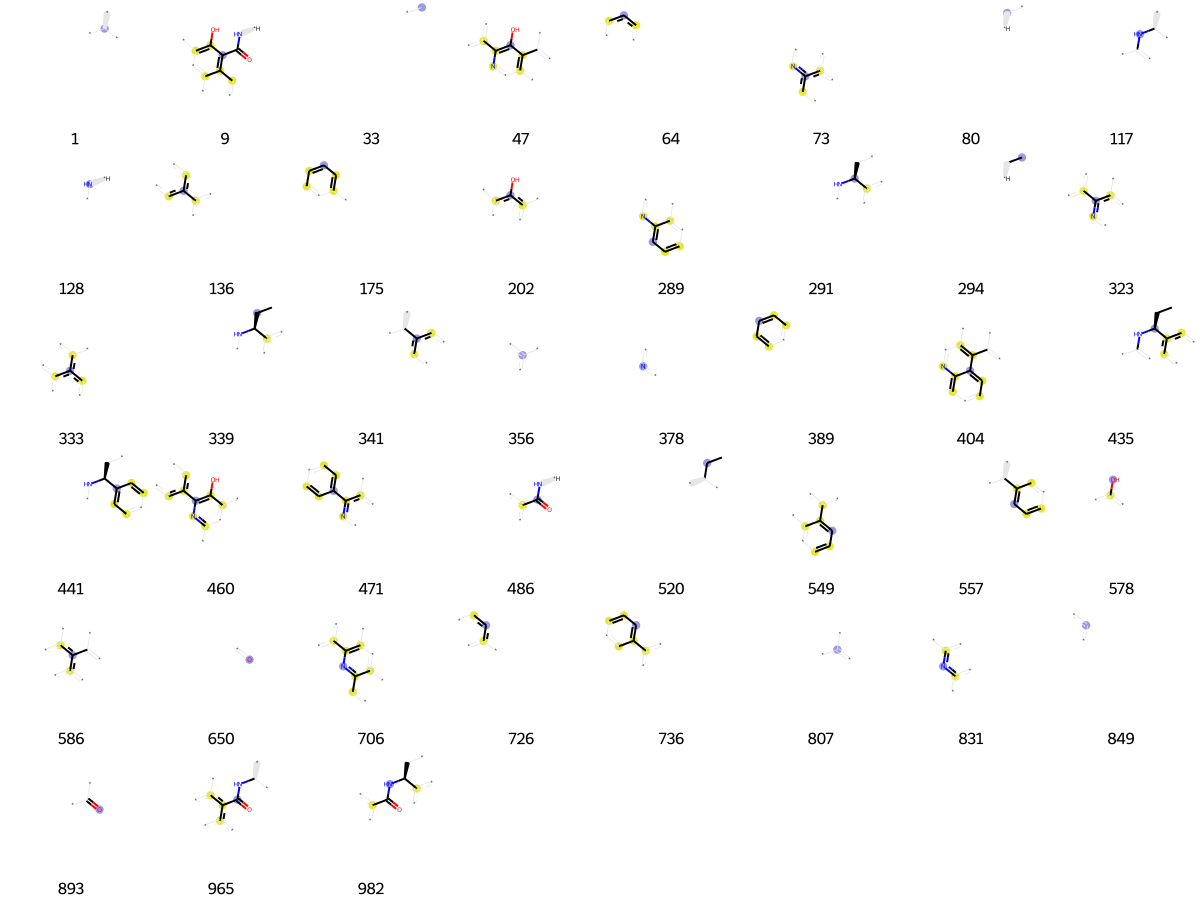

In [910]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [911]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 9,
 29,
 30,
 33,
 71,
 73,
 75,
 80,
 83,
 90,
 114,
 119,
 127,
 147,
 152,
 172,
 183,
 194,
 209,
 219,
 229,
 233,
 260,
 268,
 278,
 283,
 315,
 317,
 356,
 378,
 392,
 393,
 428,
 433,
 435,
 452,
 454,
 463,
 488,
 489,
 519,
 535,
 548,
 577,
 578,
 585,
 610,
 641,
 644,
 655,
 656,
 672,
 694,
 700,
 721,
 726,
 761,
 786,
 807,
 809,
 820,
 831,
 832,
 834,
 849,
 875,
 881,
 888,
 897,
 915,
 926,
 932,
 935,
 942,
 962,
 1019]

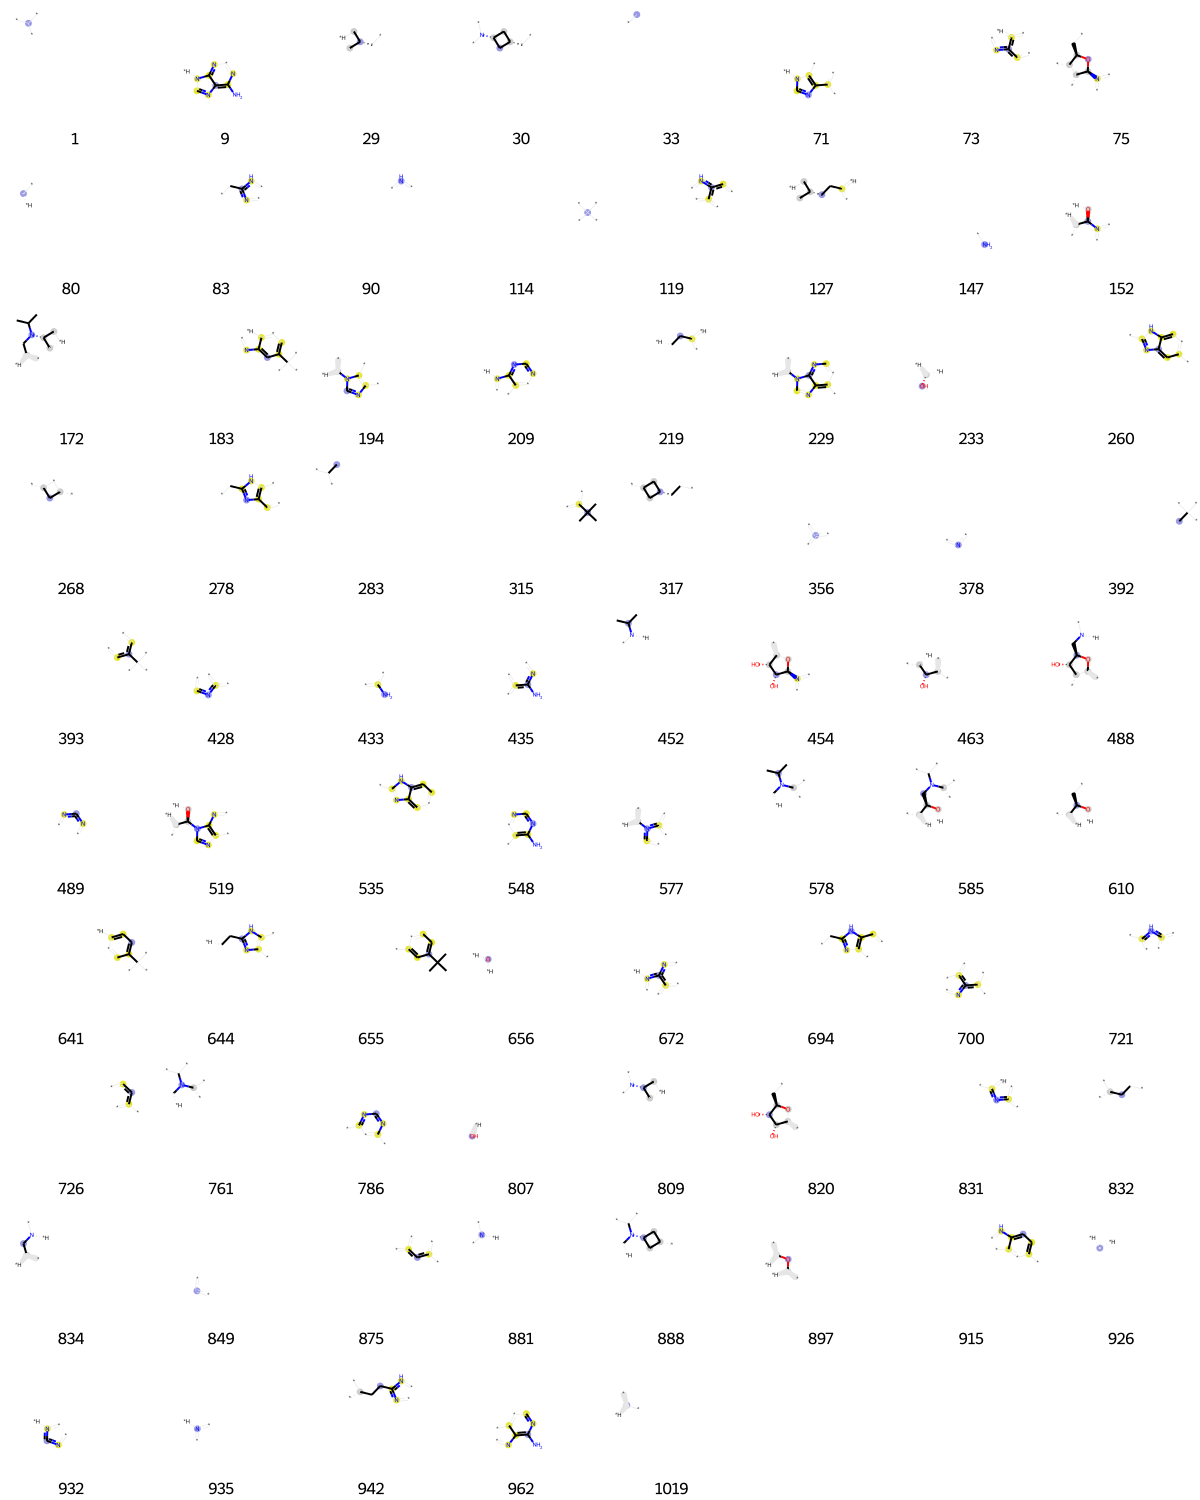

In [912]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [913]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[53,
 80,
 102,
 107,
 113,
 226,
 310,
 322,
 352,
 356,
 366,
 378,
 389,
 407,
 428,
 530,
 561,
 650,
 654,
 659,
 666,
 695,
 718,
 726,
 730,
 739,
 741,
 745,
 747,
 767,
 807,
 849,
 875,
 893,
 926,
 935,
 950,
 974,
 1019,
 1021]

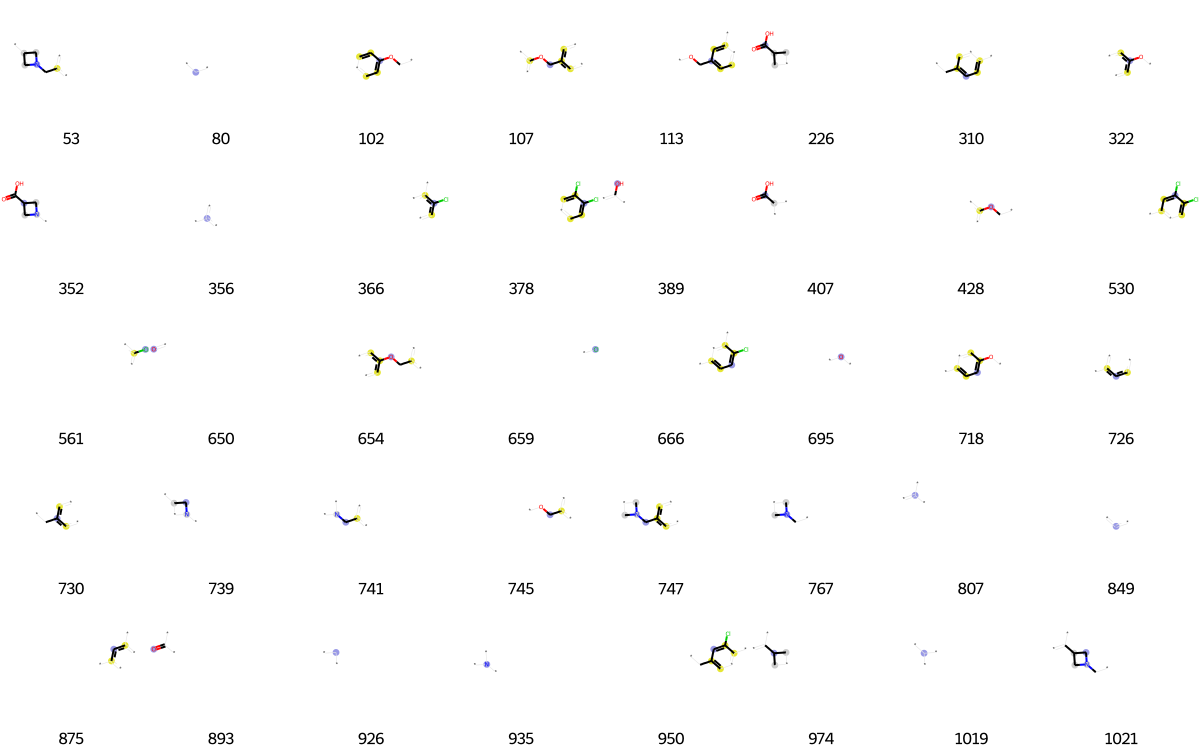

In [914]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [915]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 2,
 3,
 4,
 23,
 33,
 41,
 64,
 67,
 80,
 117,
 128,
 175,
 214,
 231,
 237,
 246,
 271,
 283,
 291,
 294,
 310,
 322,
 325,
 356,
 389,
 407,
 425,
 428,
 429,
 456,
 581,
 592,
 599,
 623,
 650,
 675,
 680,
 695,
 718,
 726,
 730,
 759,
 798,
 807,
 823,
 849,
 875,
 893,
 903,
 926,
 935,
 946,
 967,
 974]

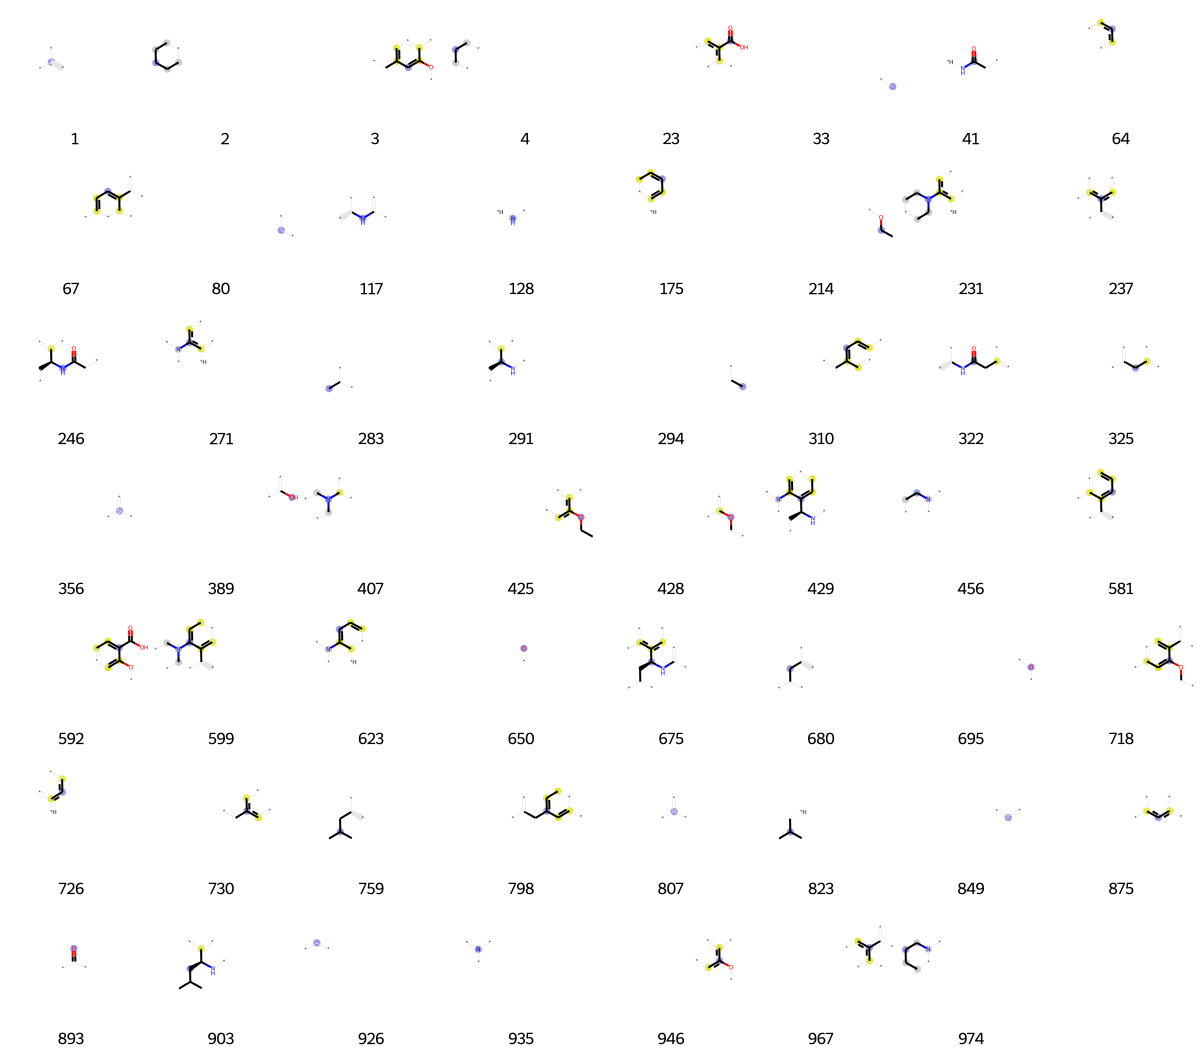

In [916]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [917]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[13,
 33,
 53,
 64,
 80,
 116,
 119,
 128,
 145,
 147,
 175,
 191,
 225,
 294,
 356,
 361,
 376,
 386,
 414,
 420,
 423,
 428,
 478,
 486,
 494,
 498,
 500,
 568,
 591,
 606,
 628,
 650,
 673,
 695,
 726,
 780,
 792,
 794,
 807,
 843,
 847,
 849,
 887,
 893,
 913,
 946,
 954,
 962,
 967,
 976]

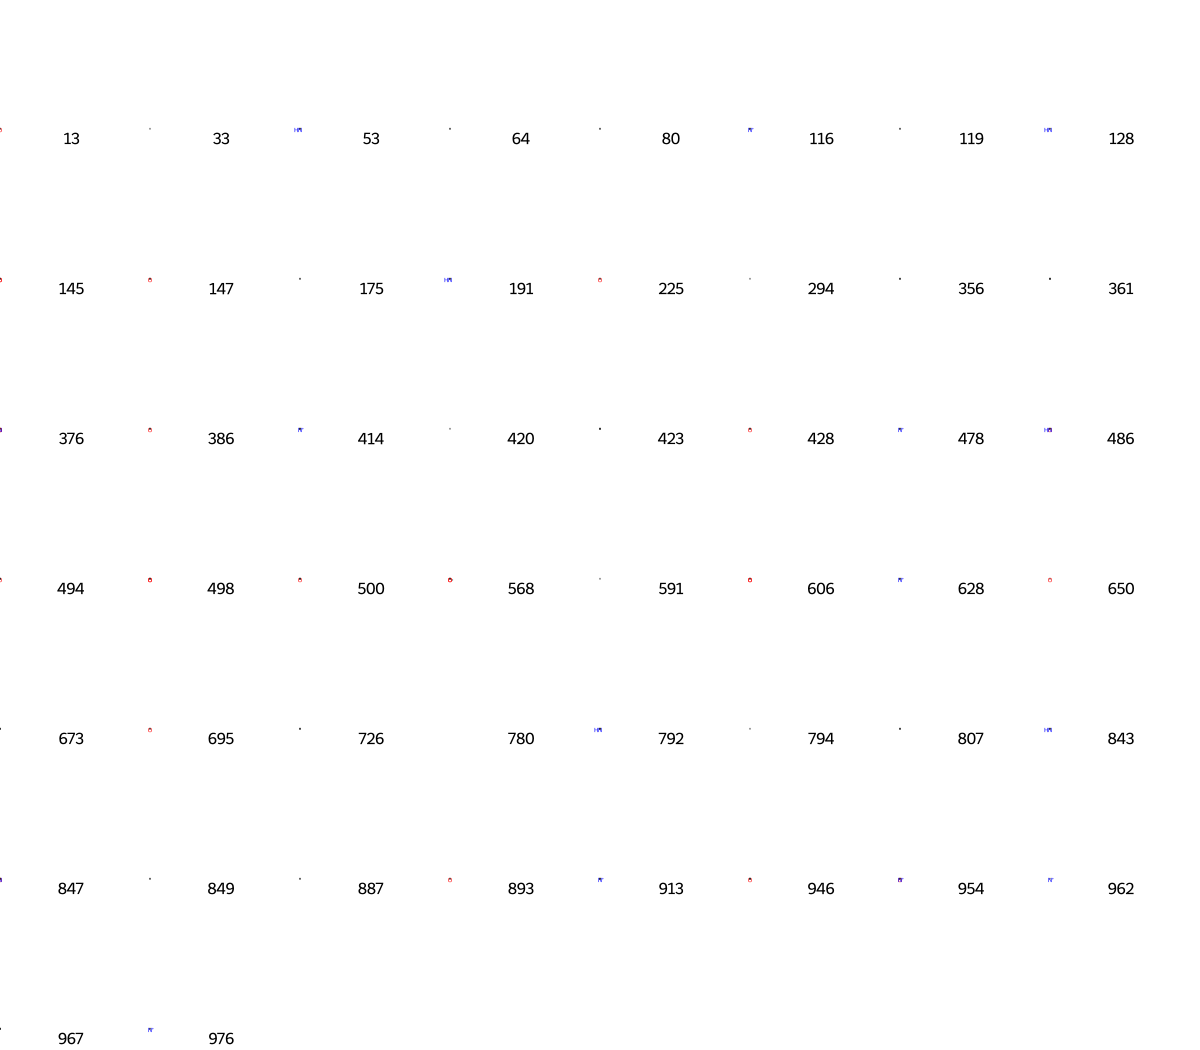

In [918]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [919]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[140, 147, 410, 650, 807, 893]

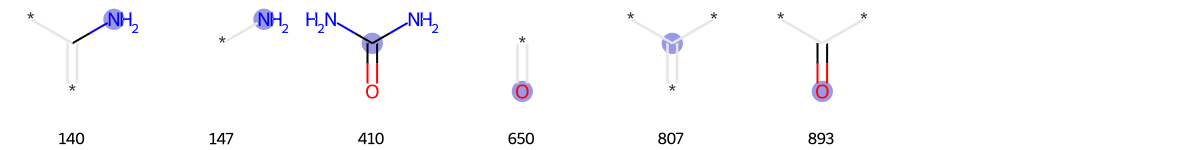

In [920]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [921]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[31,
 33,
 64,
 121,
 175,
 207,
 212,
 352,
 356,
 380,
 389,
 397,
 456,
 508,
 524,
 561,
 570,
 650,
 670,
 675,
 694,
 714,
 726,
 744,
 768,
 779,
 807,
 838,
 849,
 893,
 926,
 935,
 949,
 969,
 976,
 984,
 1020]

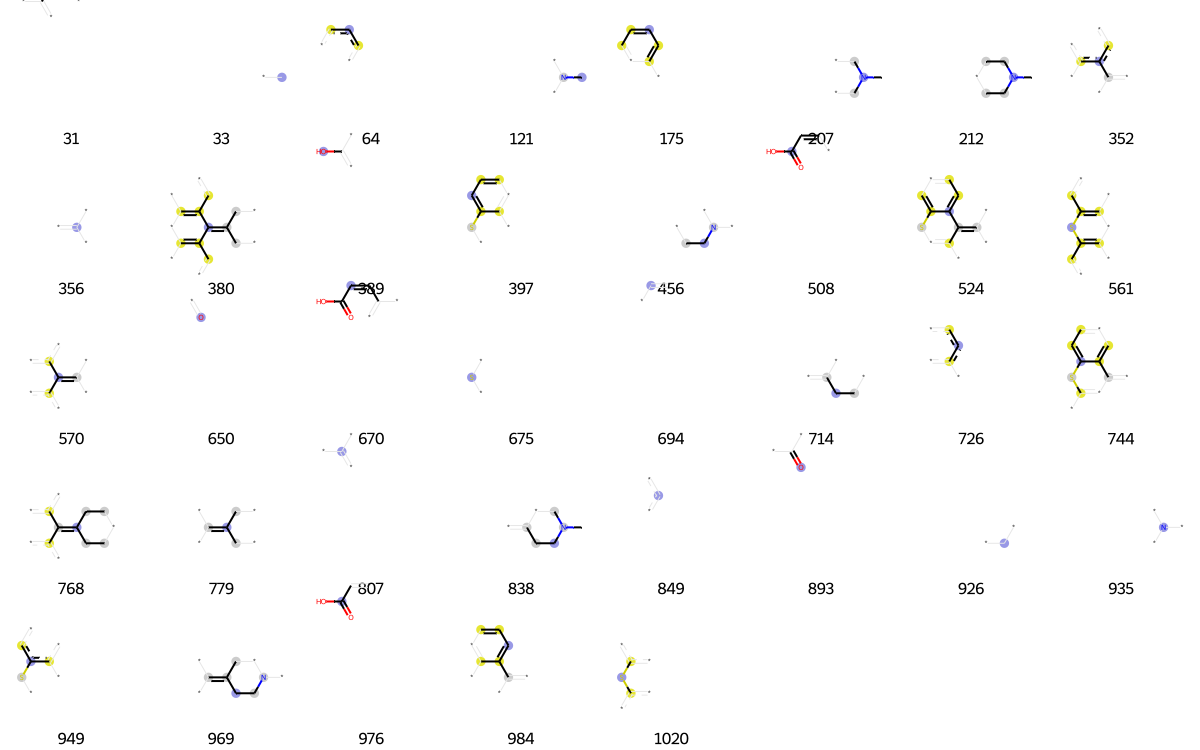

In [922]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [923]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[33,
 64,
 80,
 110,
 140,
 147,
 175,
 214,
 237,
 294,
 309,
 356,
 386,
 423,
 425,
 428,
 500,
 650,
 695,
 726,
 807,
 849,
 890,
 893,
 946,
 967]

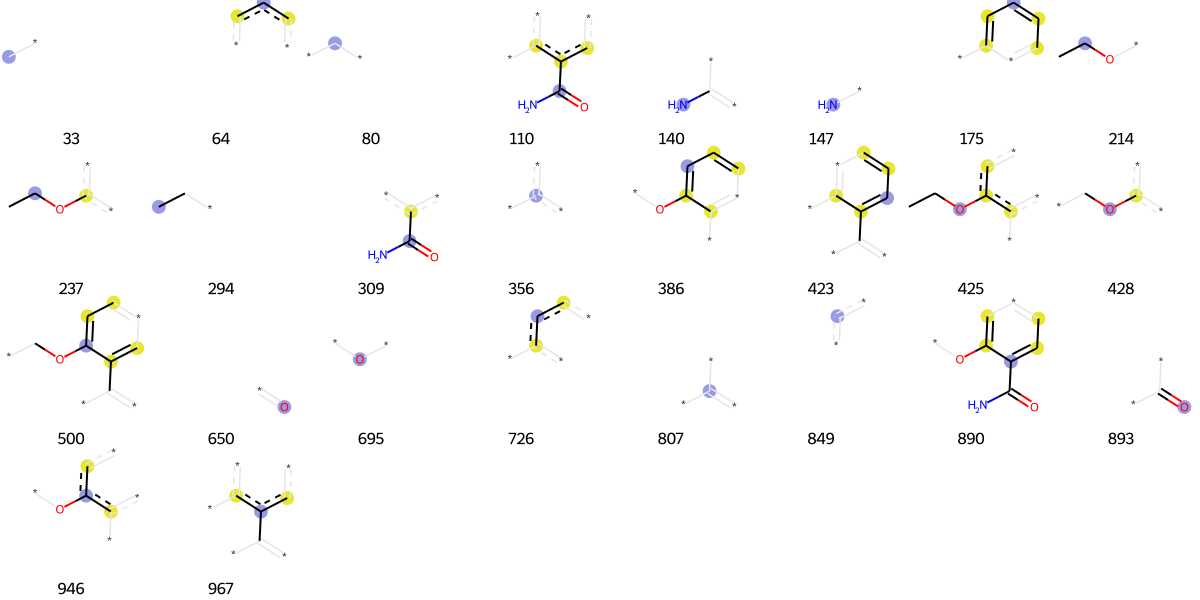

In [924]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [925]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[15,
 63,
 64,
 80,
 104,
 114,
 121,
 136,
 175,
 203,
 218,
 219,
 236,
 296,
 309,
 310,
 322,
 356,
 363,
 393,
 429,
 456,
 463,
 498,
 502,
 514,
 516,
 521,
 598,
 637,
 639,
 714,
 726,
 730,
 736,
 757,
 767,
 774,
 799,
 809,
 831,
 849,
 875,
 904,
 926,
 935,
 993]

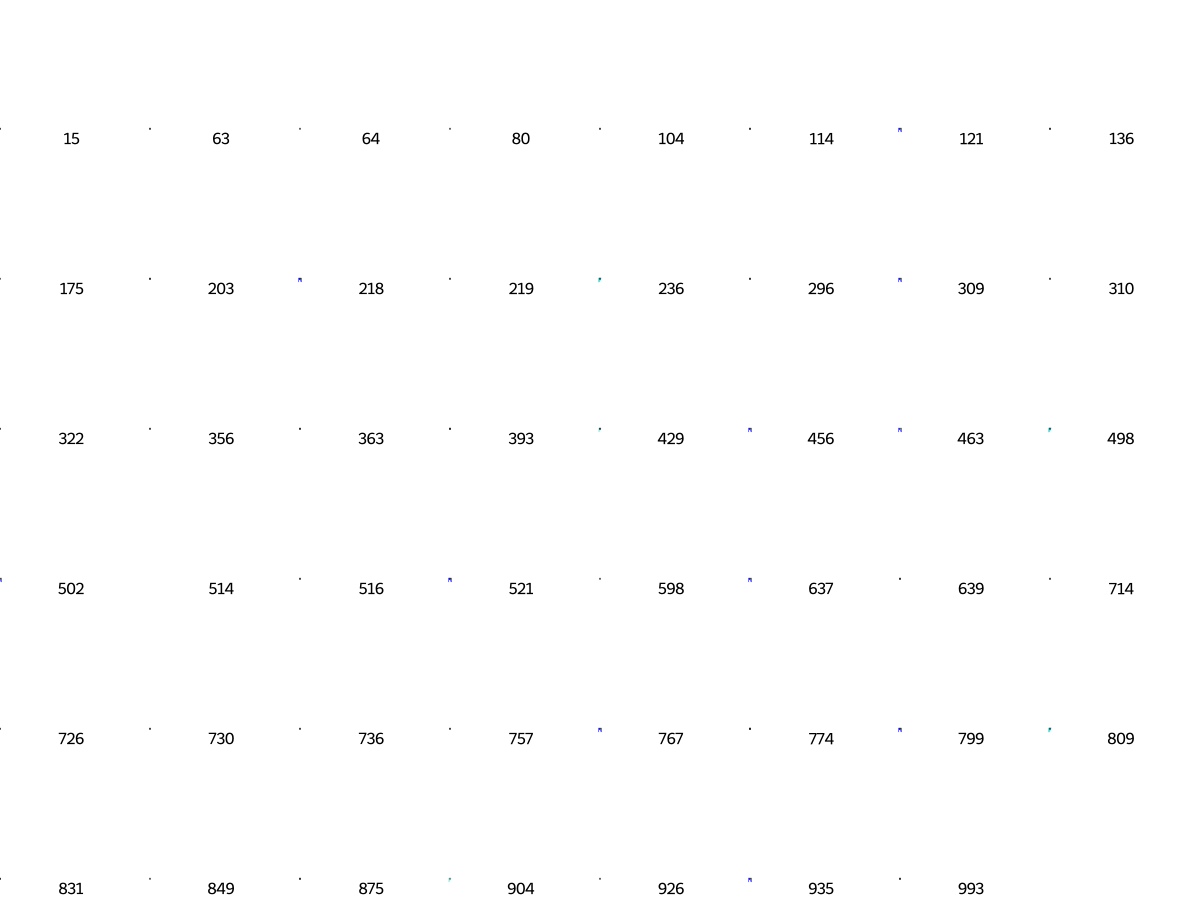

In [926]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [927]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 16,
 33,
 36,
 51,
 72,
 73,
 90,
 94,
 104,
 108,
 114,
 117,
 119,
 128,
 136,
 138,
 208,
 214,
 242,
 247,
 251,
 260,
 268,
 275,
 283,
 288,
 301,
 338,
 339,
 342,
 352,
 356,
 358,
 378,
 438,
 454,
 478,
 507,
 510,
 535,
 571,
 585,
 602,
 609,
 650,
 653,
 658,
 679,
 680,
 681,
 695,
 717,
 721,
 726,
 734,
 736,
 749,
 785,
 806,
 807,
 816,
 831,
 841,
 845,
 849,
 855,
 875,
 884,
 886,
 893,
 896,
 898,
 904,
 915,
 926,
 931,
 935,
 949,
 956,
 980,
 1019,
 1023]

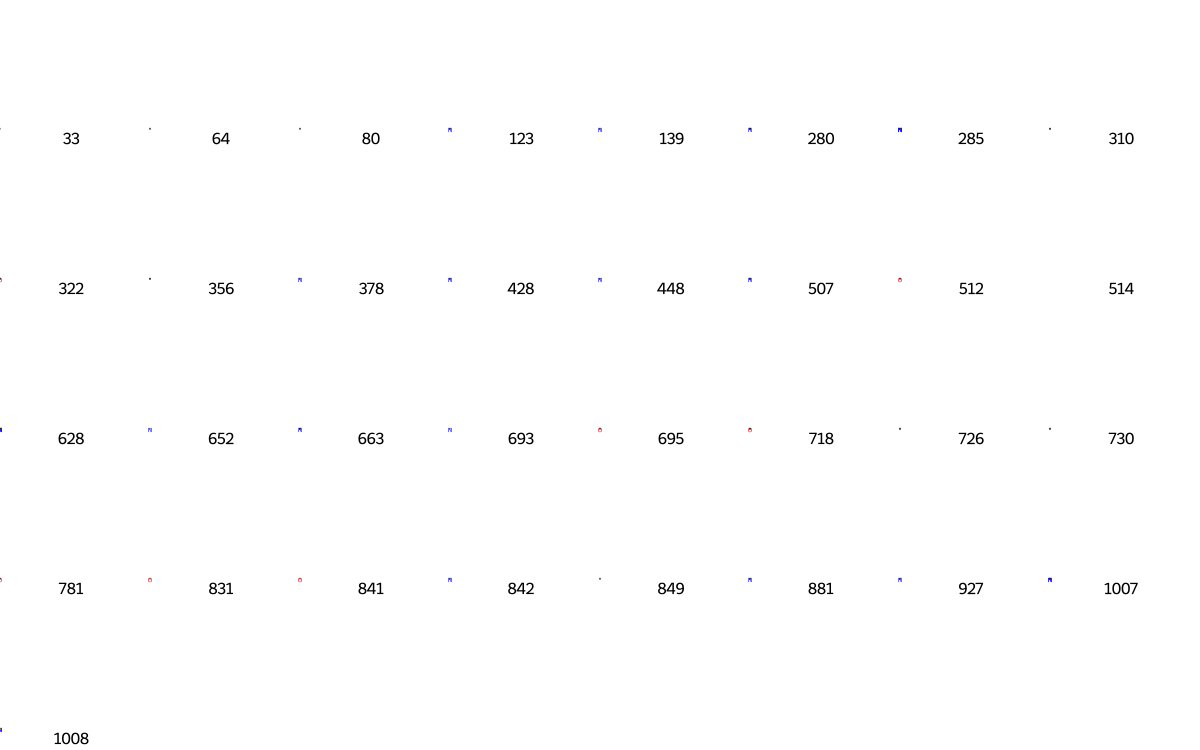

In [928]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [929]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[33,
 46,
 80,
 104,
 136,
 147,
 189,
 216,
 294,
 338,
 356,
 378,
 394,
 409,
 433,
 435,
 554,
 561,
 624,
 657,
 659,
 723,
 726,
 775,
 816,
 831,
 849,
 873,
 896]

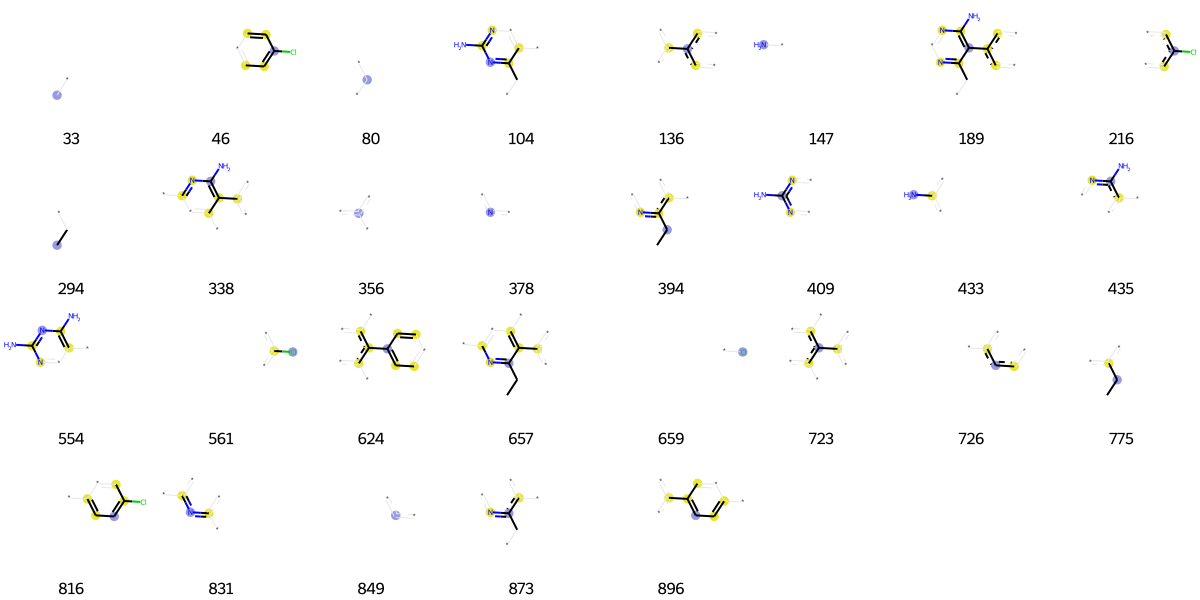

In [930]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [931]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[4,
 14,
 33,
 112,
 121,
 128,
 152,
 191,
 206,
 207,
 212,
 233,
 244,
 301,
 314,
 356,
 360,
 361,
 378,
 381,
 407,
 428,
 456,
 458,
 484,
 491,
 495,
 500,
 504,
 507,
 511,
 544,
 545,
 558,
 562,
 650,
 672,
 674,
 687,
 726,
 770,
 784,
 790,
 801,
 831,
 838,
 843,
 849,
 875,
 886,
 890,
 910,
 926,
 935,
 969,
 1019,
 1022]

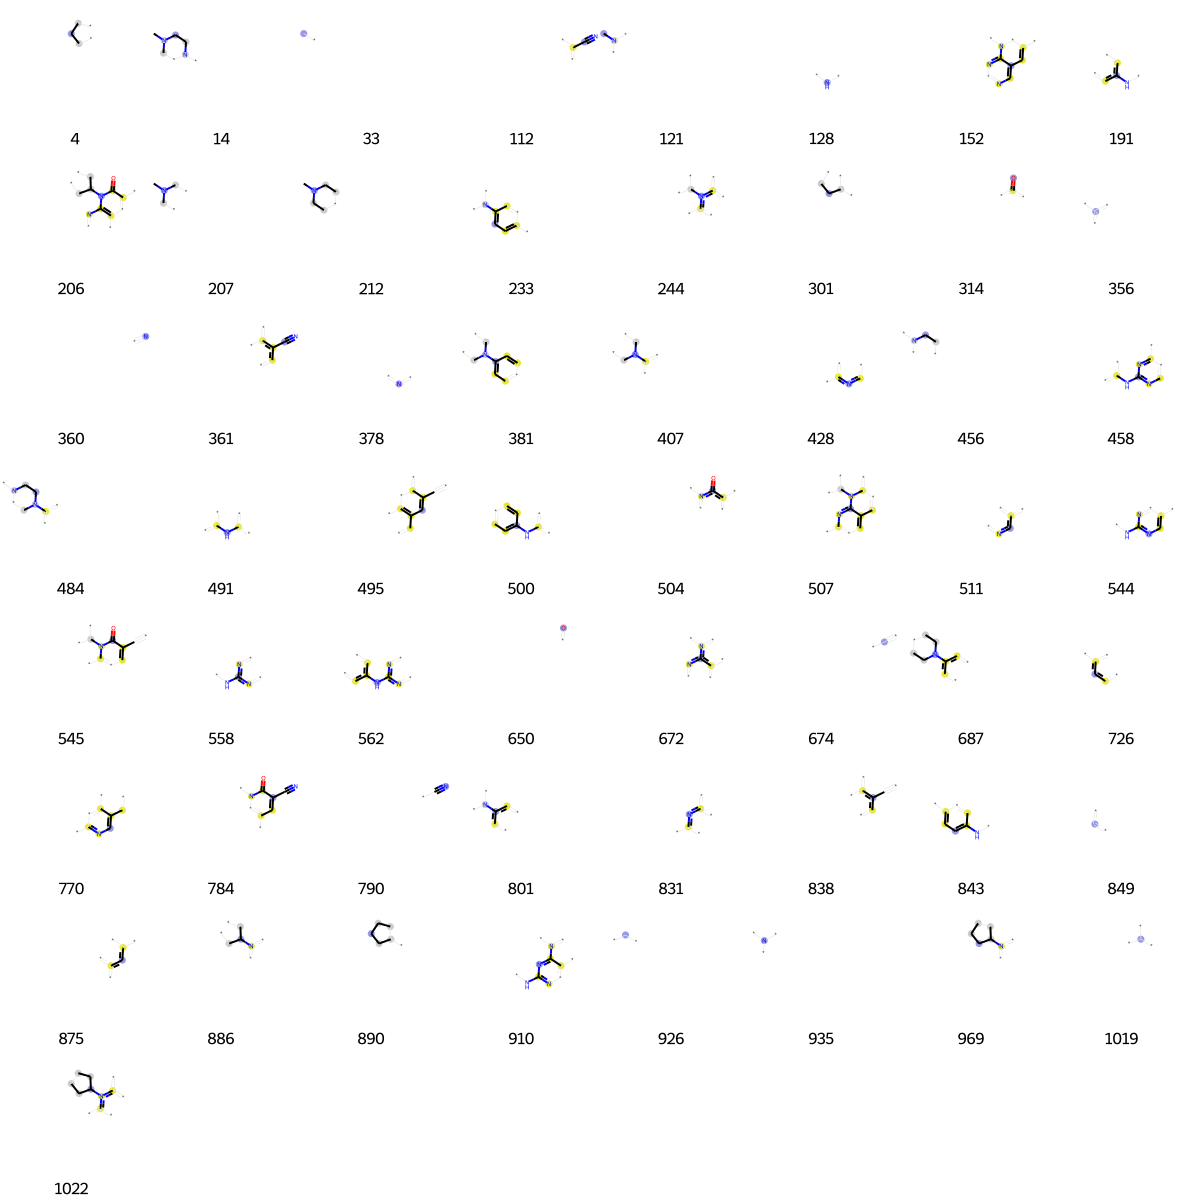

In [932]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [933]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[15,
 47,
 64,
 80,
 101,
 116,
 140,
 162,
 168,
 223,
 232,
 246,
 341,
 356,
 366,
 378,
 390,
 428,
 466,
 511,
 543,
 551,
 561,
 562,
 579,
 659,
 675,
 726,
 762,
 797,
 842,
 849,
 881,
 910,
 961,
 974,
 980,
 995,
 999,
 1010]

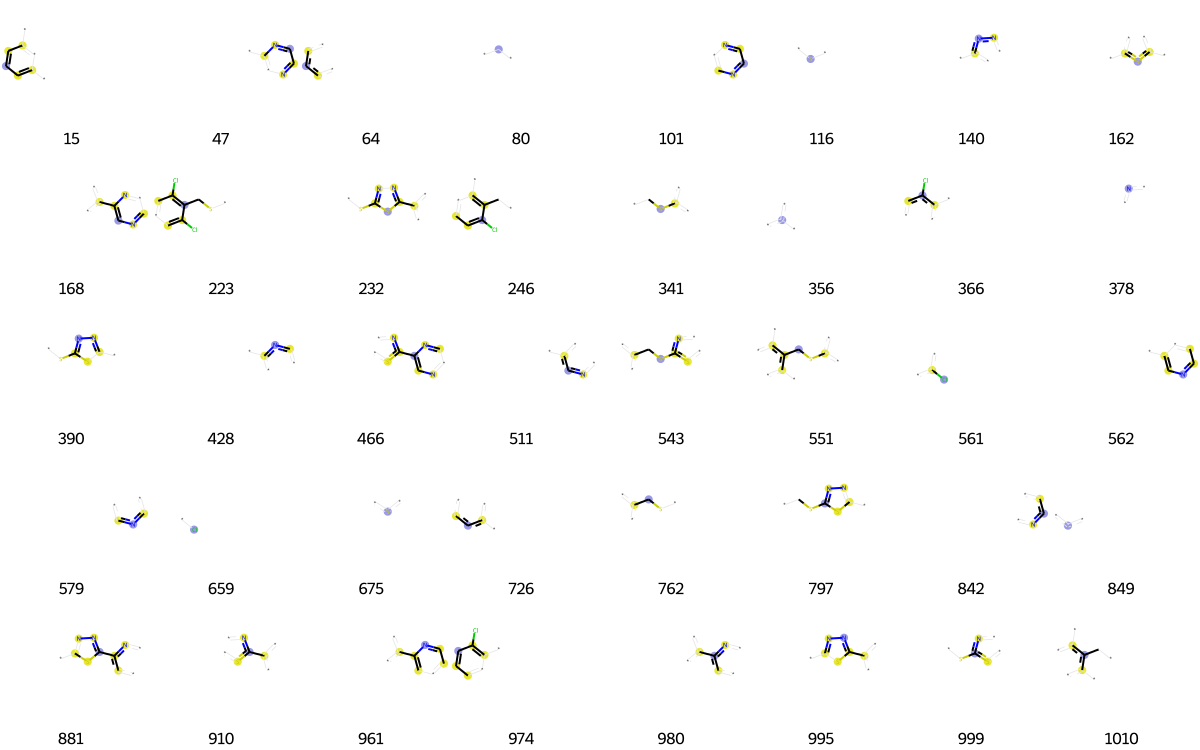

In [934]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [935]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[12,
 28,
 29,
 33,
 80,
 104,
 112,
 122,
 128,
 145,
 147,
 171,
 200,
 301,
 356,
 367,
 381,
 406,
 418,
 421,
 447,
 470,
 486,
 491,
 518,
 570,
 598,
 614,
 647,
 650,
 661,
 695,
 698,
 699,
 701,
 726,
 807,
 816,
 832,
 836,
 849,
 859,
 875,
 893,
 904,
 926,
 947,
 950,
 967,
 999,
 1019]

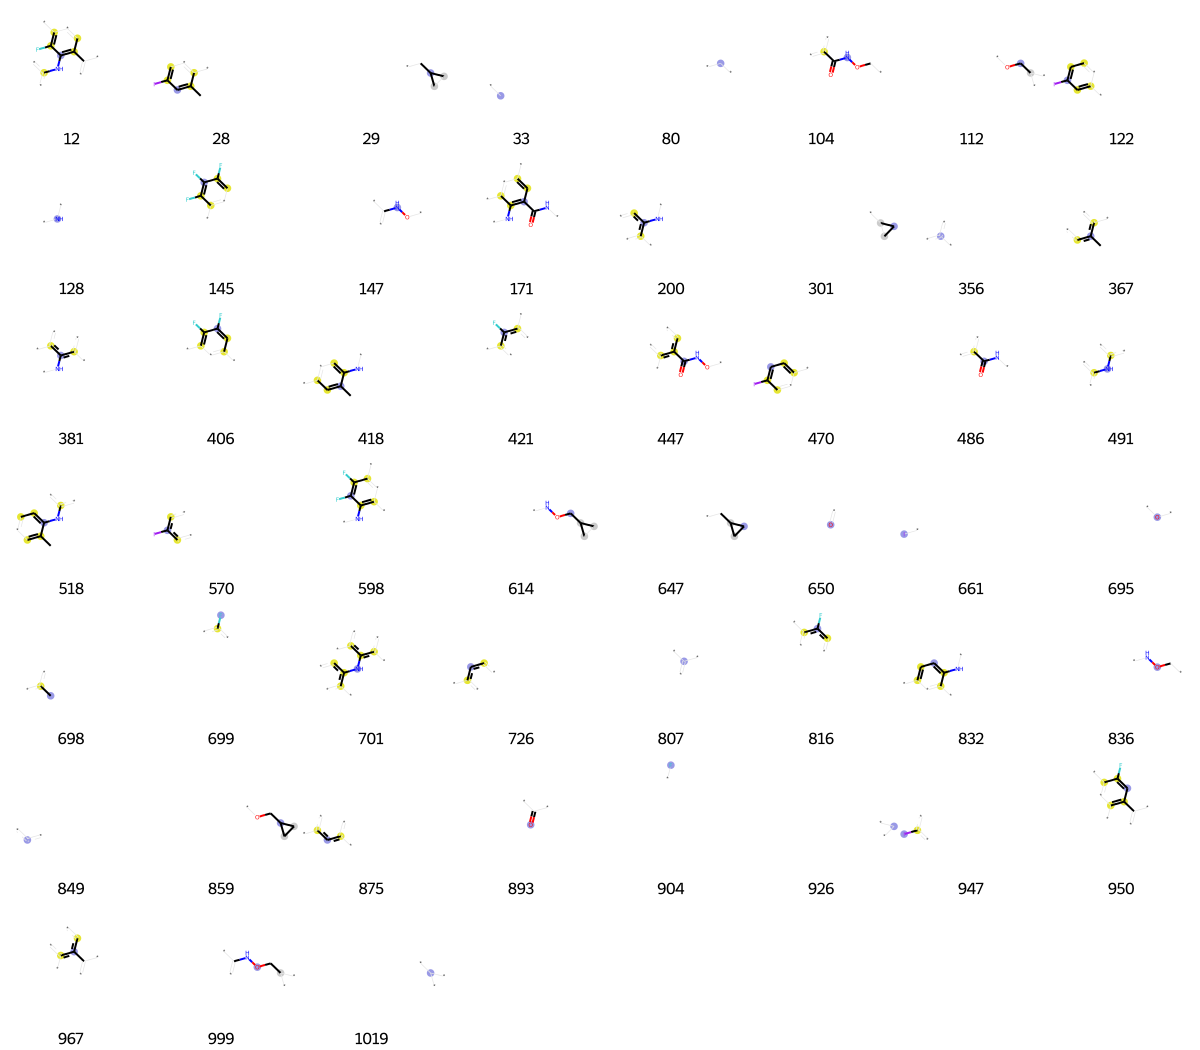

In [936]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [937]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 34,
 63,
 80,
 90,
 122,
 123,
 128,
 184,
 197,
 200,
 222,
 227,
 293,
 297,
 356,
 378,
 459,
 470,
 475,
 482,
 486,
 491,
 500,
 511,
 562,
 570,
 579,
 606,
 650,
 661,
 699,
 726,
 807,
 816,
 832,
 842,
 846,
 849,
 875,
 891,
 893,
 904,
 947,
 953,
 967,
 990,
 1014]

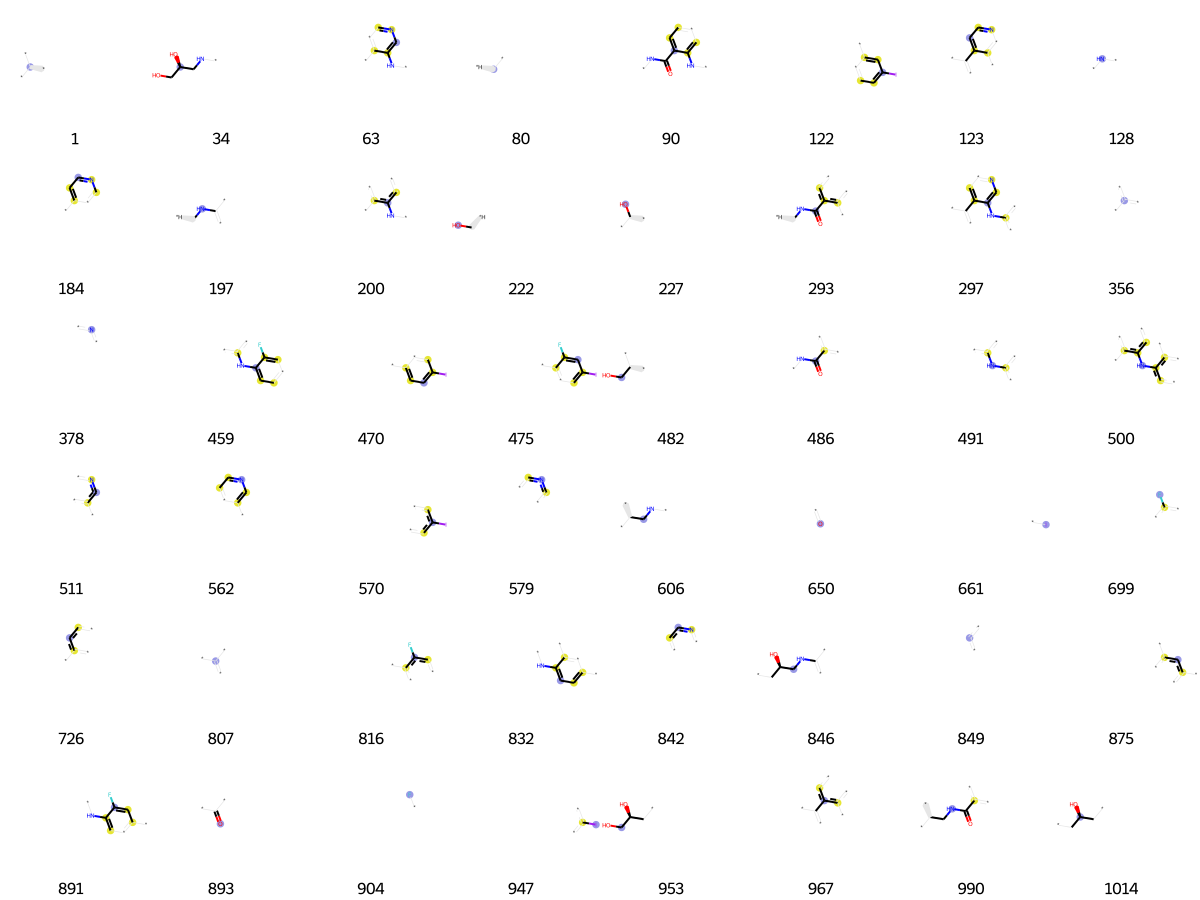

In [938]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [939]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 80,
 128,
 147,
 197,
 244,
 389,
 403,
 412,
 524,
 623,
 624,
 646,
 650,
 667,
 708,
 715,
 739,
 753,
 767,
 786,
 807,
 820,
 825,
 838,
 852,
 887,
 893,
 905,
 939,
 980,
 994]

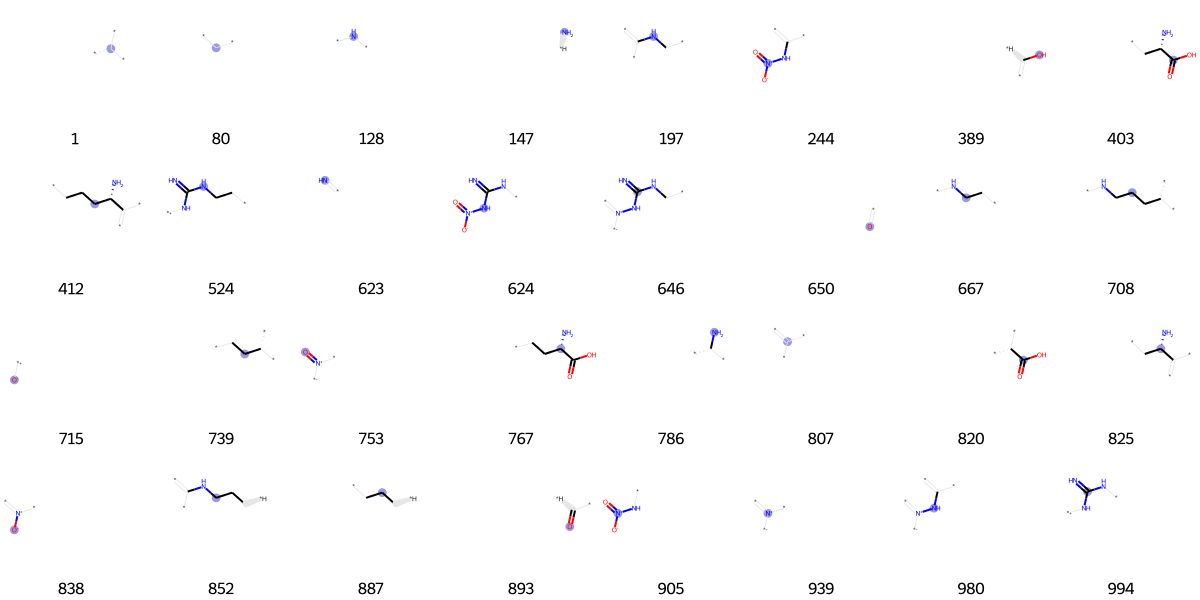

In [940]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [941]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[33,
 35,
 45,
 46,
 80,
 85,
 87,
 114,
 193,
 215,
 216,
 252,
 310,
 333,
 335,
 356,
 386,
 389,
 392,
 398,
 422,
 463,
 561,
 588,
 646,
 650,
 659,
 672,
 698,
 699,
 726,
 730,
 741,
 802,
 807,
 816,
 849,
 852,
 875,
 888,
 893,
 904,
 935,
 953,
 997]

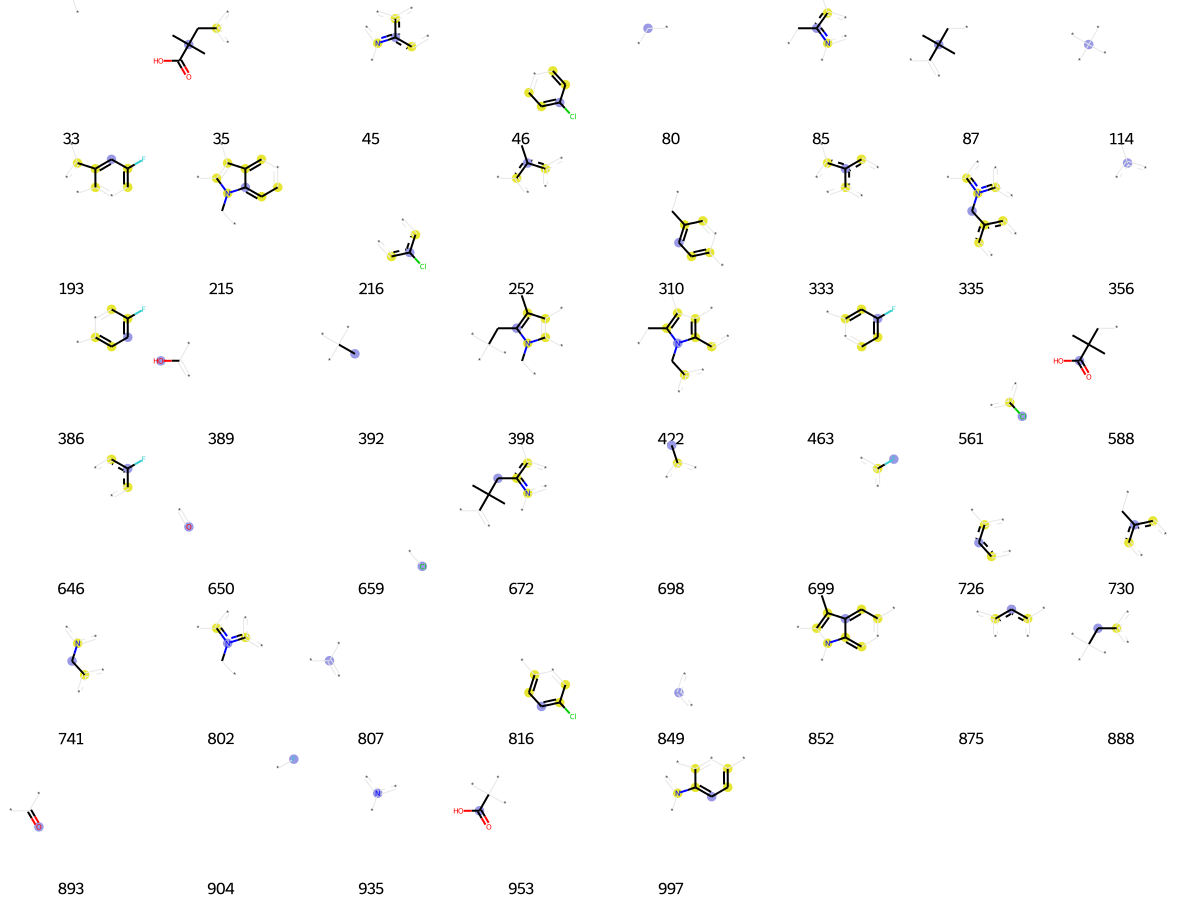

In [942]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [943]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 10,
 13,
 73,
 80,
 90,
 114,
 119,
 125,
 145,
 180,
 181,
 266,
 285,
 322,
 343,
 356,
 373,
 378,
 385,
 428,
 429,
 432,
 511,
 548,
 585,
 625,
 676,
 691,
 695,
 718,
 721,
 726,
 788,
 825,
 831,
 849,
 875,
 887,
 892,
 904,
 961,
 968,
 980]

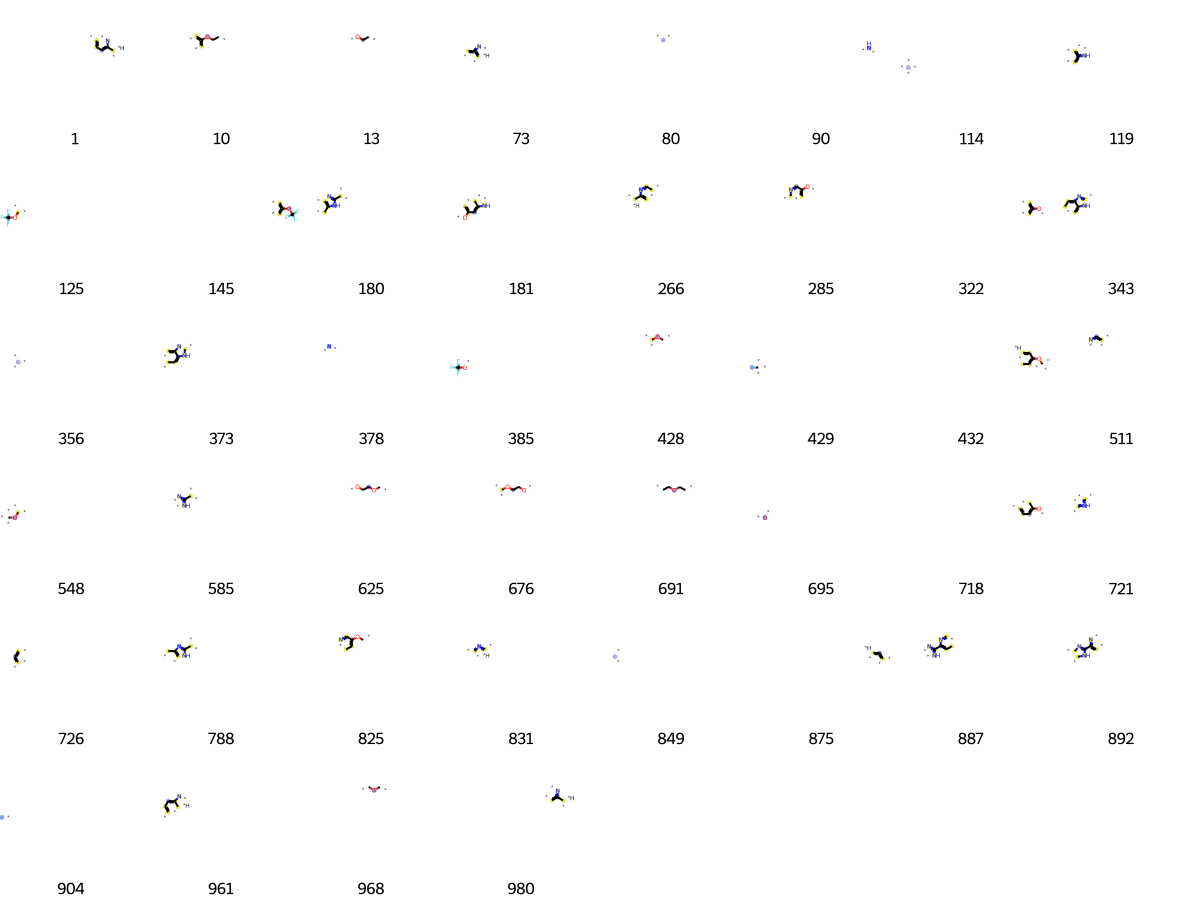

In [944]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [945]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33,
 35,
 36,
 40,
 46,
 59,
 60,
 64,
 73,
 101,
 104,
 105,
 130,
 147,
 203,
 206,
 212,
 233,
 268,
 285,
 299,
 314,
 335,
 356,
 357,
 389,
 407,
 444,
 463,
 511,
 533,
 547,
 550,
 571,
 590,
 593,
 598,
 608,
 612,
 628,
 650,
 653,
 656,
 678,
 679,
 695,
 699,
 703,
 722,
 733,
 750,
 767,
 795,
 804,
 805,
 807,
 808,
 820,
 835,
 839,
 843,
 849,
 862,
 869,
 879,
 893,
 897,
 926,
 929,
 936,
 944,
 970,
 977,
 1019]

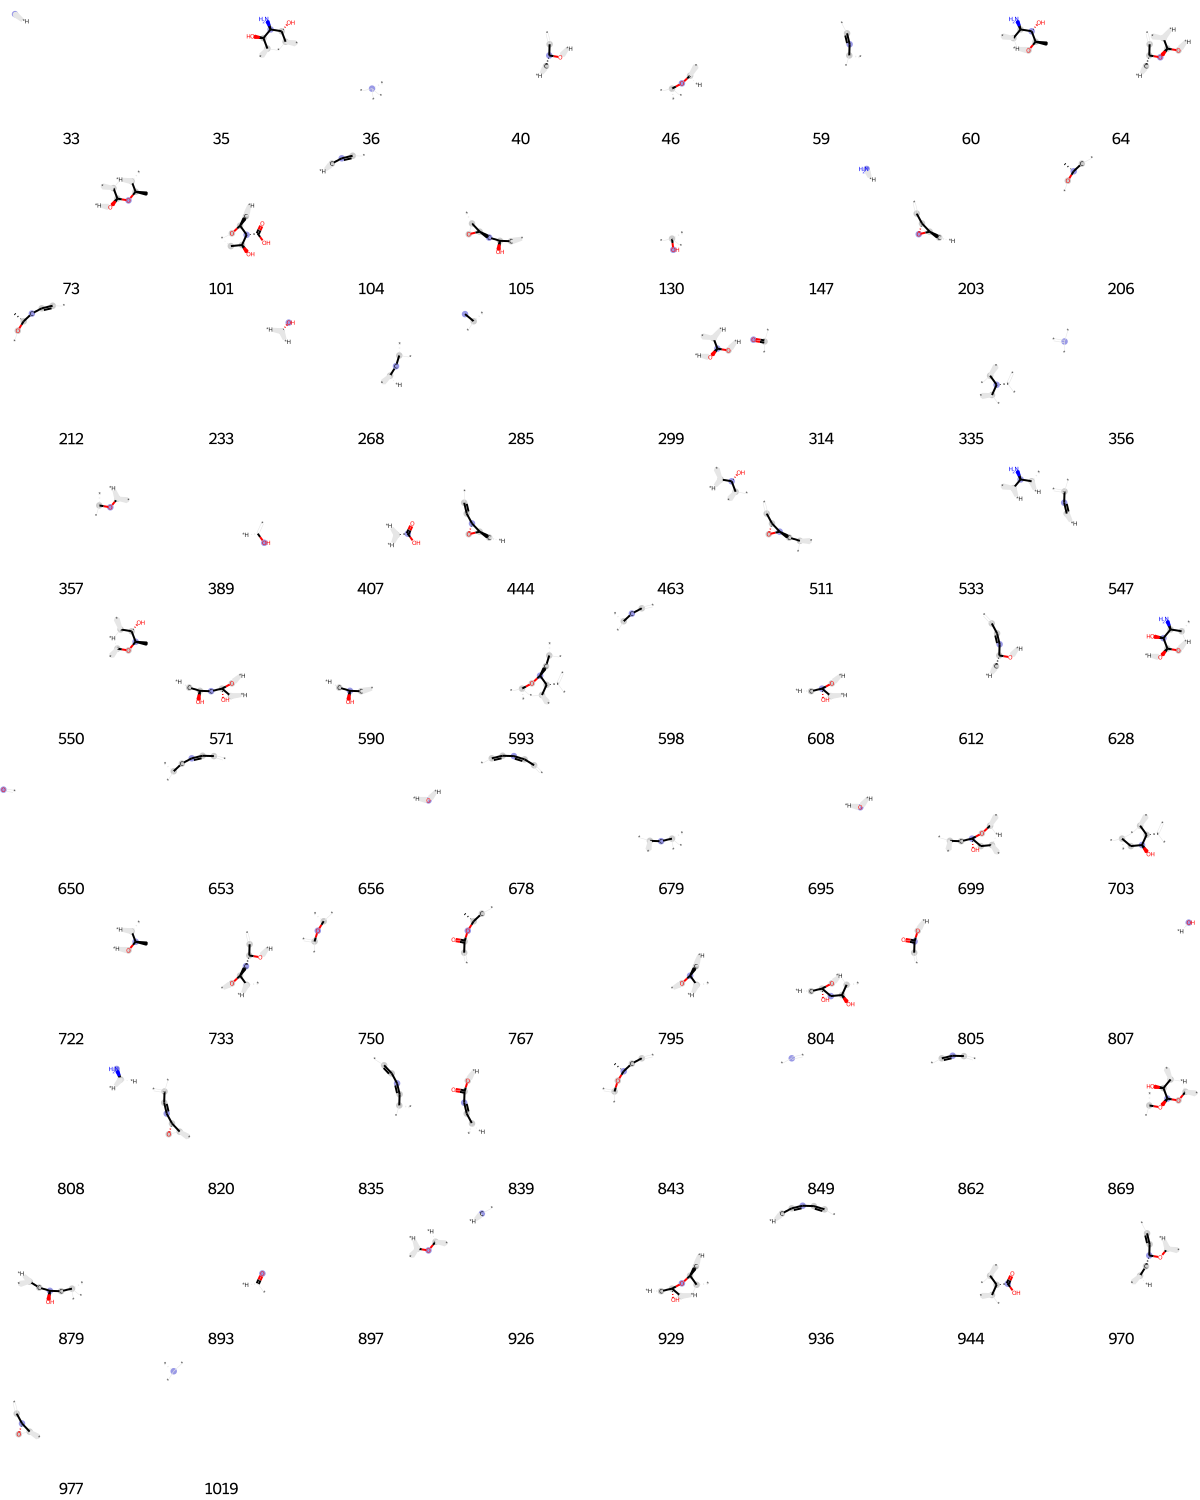

In [946]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [947]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[31, 60, 80, 222, 332, 389, 451, 508, 575, 650, 694, 807, 827, 893, 976]

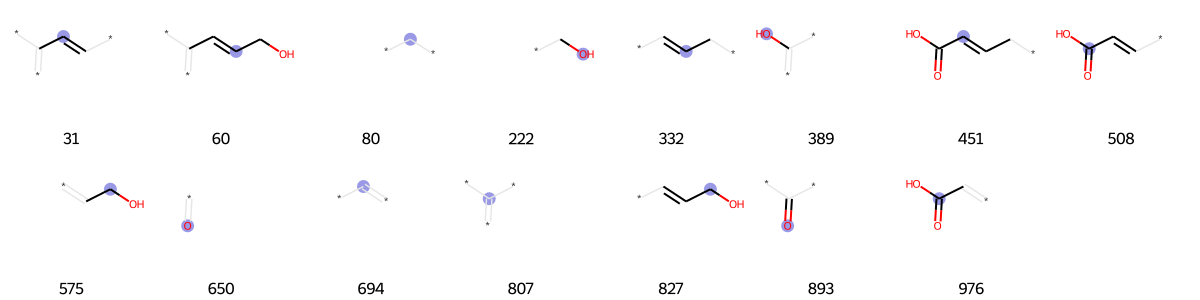

In [948]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [949]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 3,
 9,
 15,
 45,
 64,
 98,
 116,
 117,
 118,
 134,
 147,
 165,
 202,
 247,
 305,
 314,
 356,
 366,
 378,
 386,
 428,
 463,
 552,
 553,
 561,
 597,
 638,
 640,
 646,
 650,
 659,
 699,
 723,
 726,
 754,
 816,
 849,
 875,
 899,
 904,
 925,
 932,
 935,
 946,
 974,
 997]